### Importing the required libraries

In [124]:
import os # To navigate through directories, getting environment variables, and checking file permissions.
import pandas as pd # To perform data manipulation and analysis
import numpy as np #Working with arrays, matrices, and mathematical operations
import matplotlib.pyplot as plt #For creating static, animated, and interactive visualizations
import seaborn as sns #For creating high-level graphs
import time # To get the current time, delaying program execution, and measuring elapsed time.
import missingno as msno #To visualize missing data in a dataset
from sklearn.model_selection import train_test_split #For splitting a dataset into training,testing/validation data subsets
from sklearn.preprocessing import MinMaxScaler # For normalizing numerical data
from sklearn.metrics import accuracy_score #  To get the accuracy scores of a machine learning model
from sklearn.metrics import classification_report # To generate report of classification metrics
from sklearn.metrics import confusion_matrix # To generate confusion matrix of a classification model
from sklearn.ensemble import RandomForestClassifier # To import the "RandomForestClassifier" class from the "ensemble" module of the scikit-learn library
from sklearn.svm import SVC # To import the "SVC" class from the "svm" module 
from sklearn.linear_model import LogisticRegression # To import the "LogisticRegression" class from the "linear_model" module 
from sklearn.naive_bayes import GaussianNB #imports the "GaussianNB" class from the "naive_bayes" module 
from sklearn.tree import DecisionTreeClassifier #imports the "DecisionTreeClassifier" class from the "tree" module
from sklearn.preprocessing import label_binarize # To binarize the classes
from sklearn.metrics import roc_curve, auc # To create ROC curve
%config InlineBackend.figure_format = 'retina' # To set resolution of figures
sns.set(rc={'figure.figsize':(20,14)}) # To set default figure size

In [67]:
# To open a file and print all its contents
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [68]:
# Appending columns to the existing dataset and adding  target column.
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
  
columns.append('target')
print(len(columns)) # length of columns

42


In [69]:
# To open "training_attack_types" file and print attack types
with open("training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [70]:
# Creating dictionary for training_attack_types 
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [71]:
# To read the content from compressed file and assign to a dataframe
path = "kddcup.data_10_percent.gz"
kdd_df = pd.read_csv(path, names = columns)
kdd_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


Adding attack types to the dataframe kdd_df

In [72]:
# Adding Attack Type column to the existing dataframe
kdd_df['Attack_Type'] = kdd_df.target.apply(lambda r:attacks_types[r[:-1]])
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


### Exploratory Data Analysis

In [73]:
#To get shape of the dataframe
kdd_df.shape

(494021, 43)

The dataset for our analysis has 494021 rows and 43 columns with 42 predictor variables and 1 response variable.

In [74]:
# Checking for missing values
kdd_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

We can see that there are no null values in the dataset from the above snippet.

In [75]:
# To provide statistical summary of the data
kdd_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 300x300 with 0 Axes>

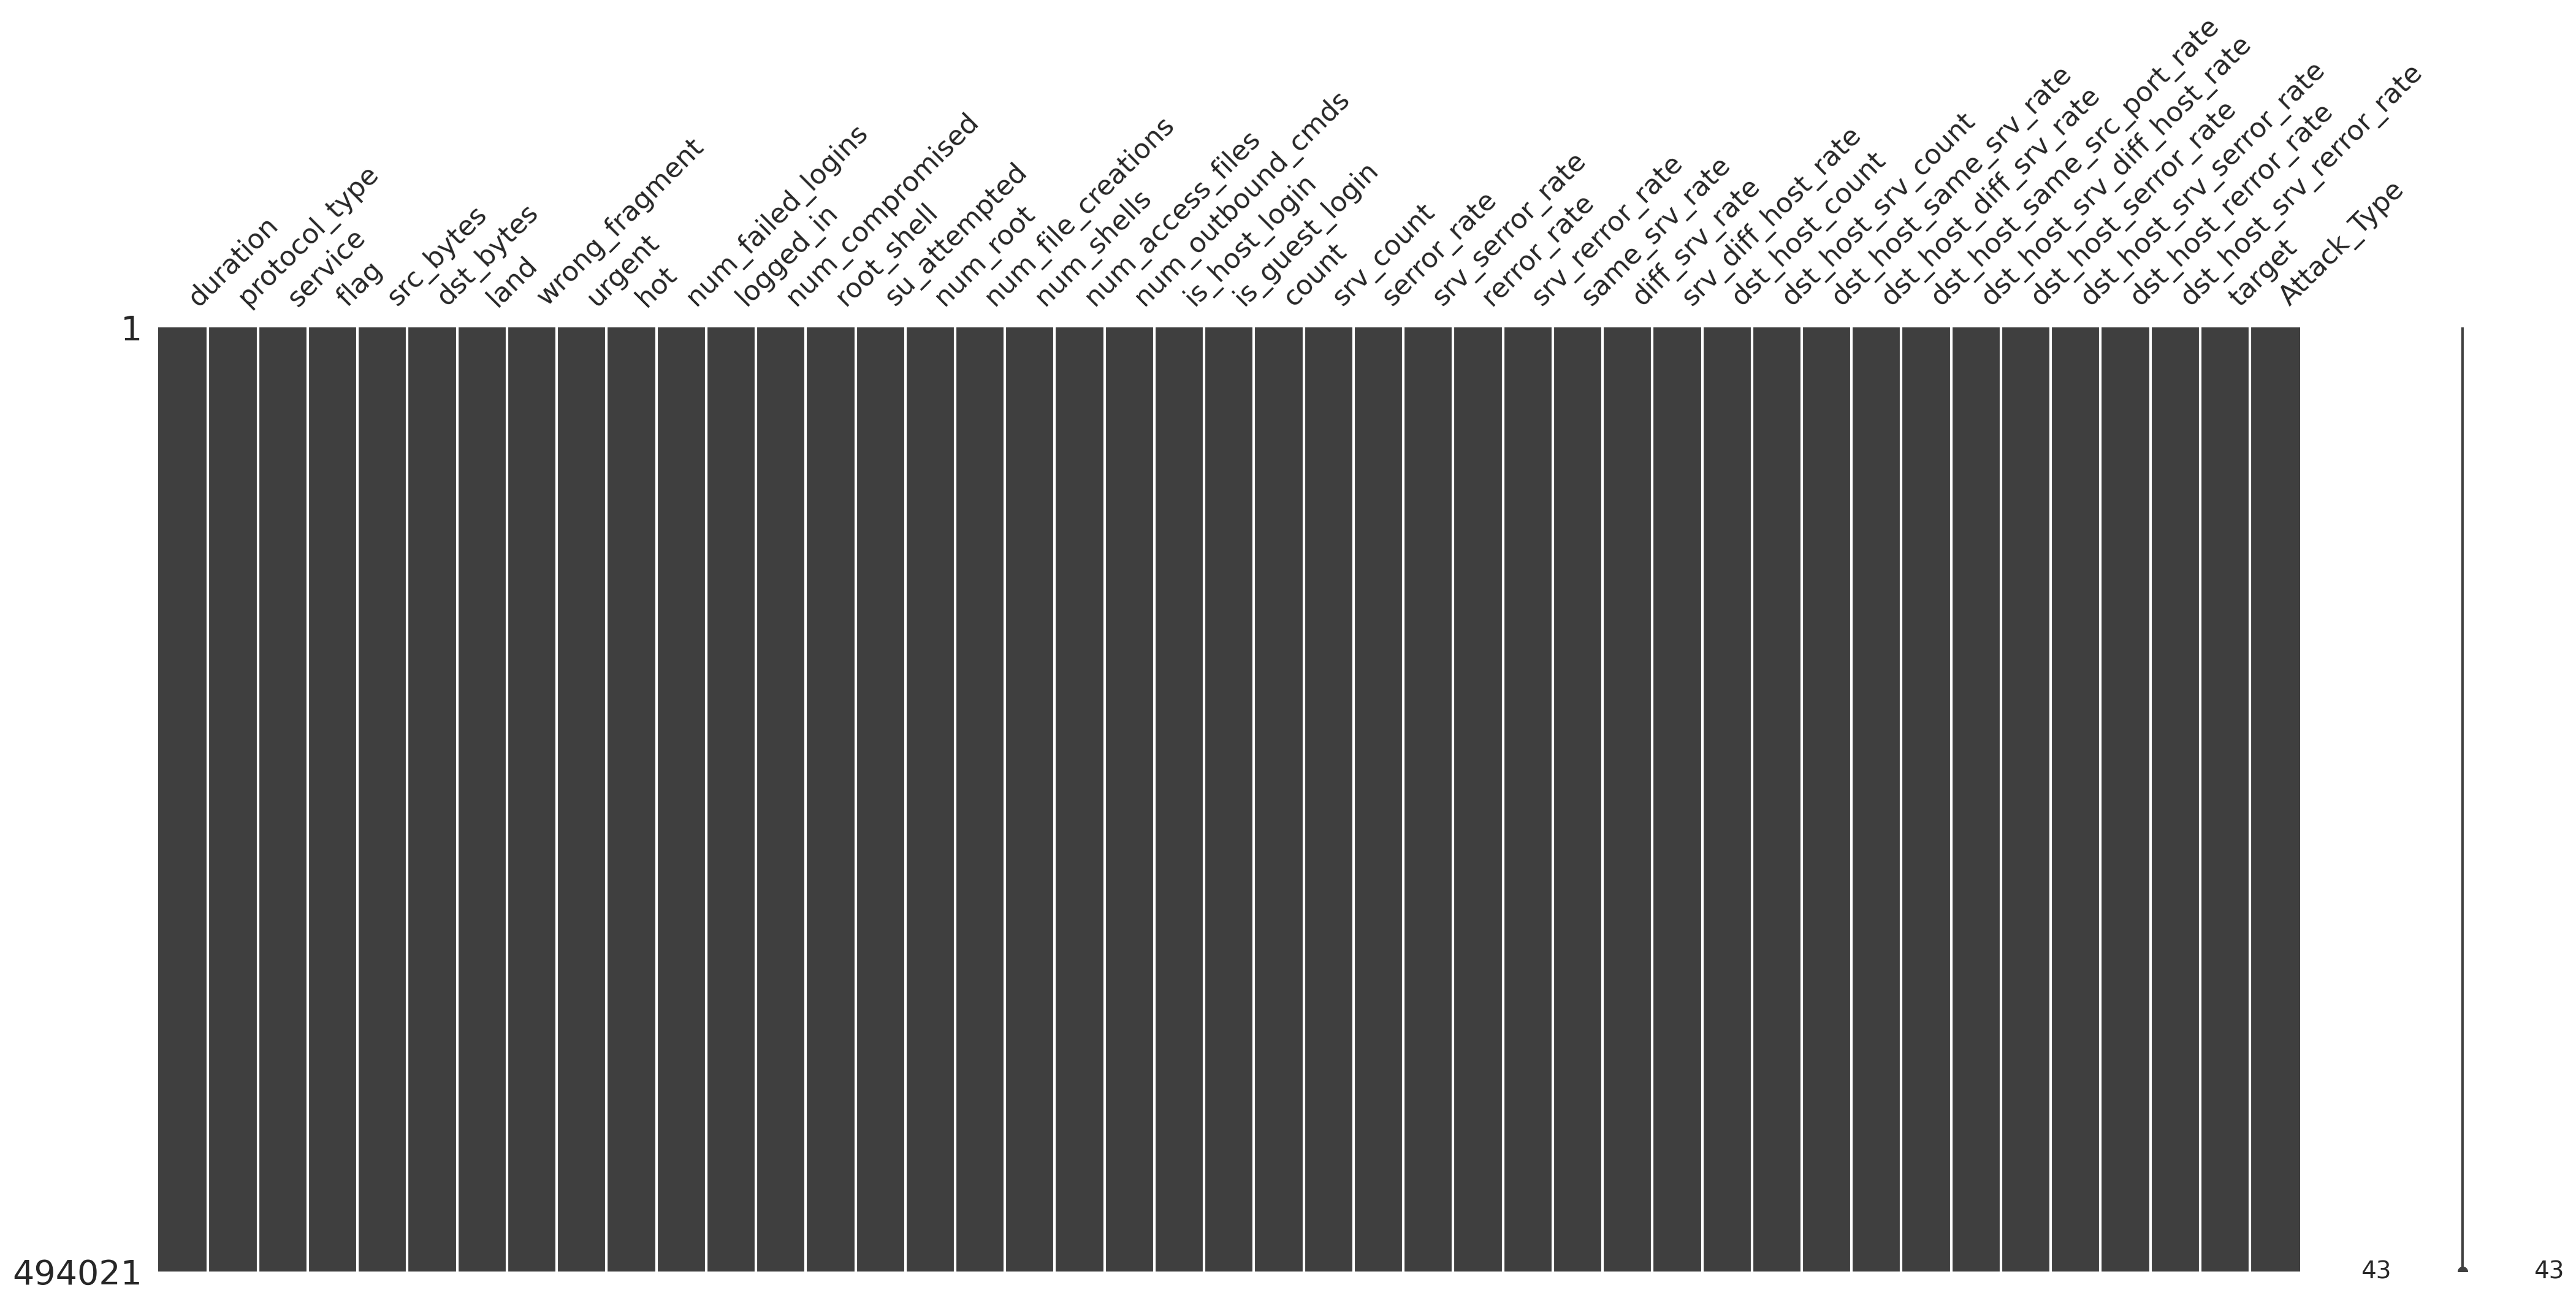

In [76]:
# Visualizing missing values
plt.figure(figsize=(3,3))
msno.matrix(kdd_df)
plt.show()

We can see from the above plot that there are no missing values in the dataset

In [77]:
#To list categorical features of the dataframe
numerical_cols = kdd_df._get_numeric_data().columns
  
categorical_cols = list(set(kdd_df.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack_Type')
  
categorical_cols

['protocol_type', 'service', 'flag']

The columns 'protocol_type', 'service' and 'flag' are the categorical features present in our data set and used for classification

### Visualizing categorical features to know the distribution of classes among each predictors

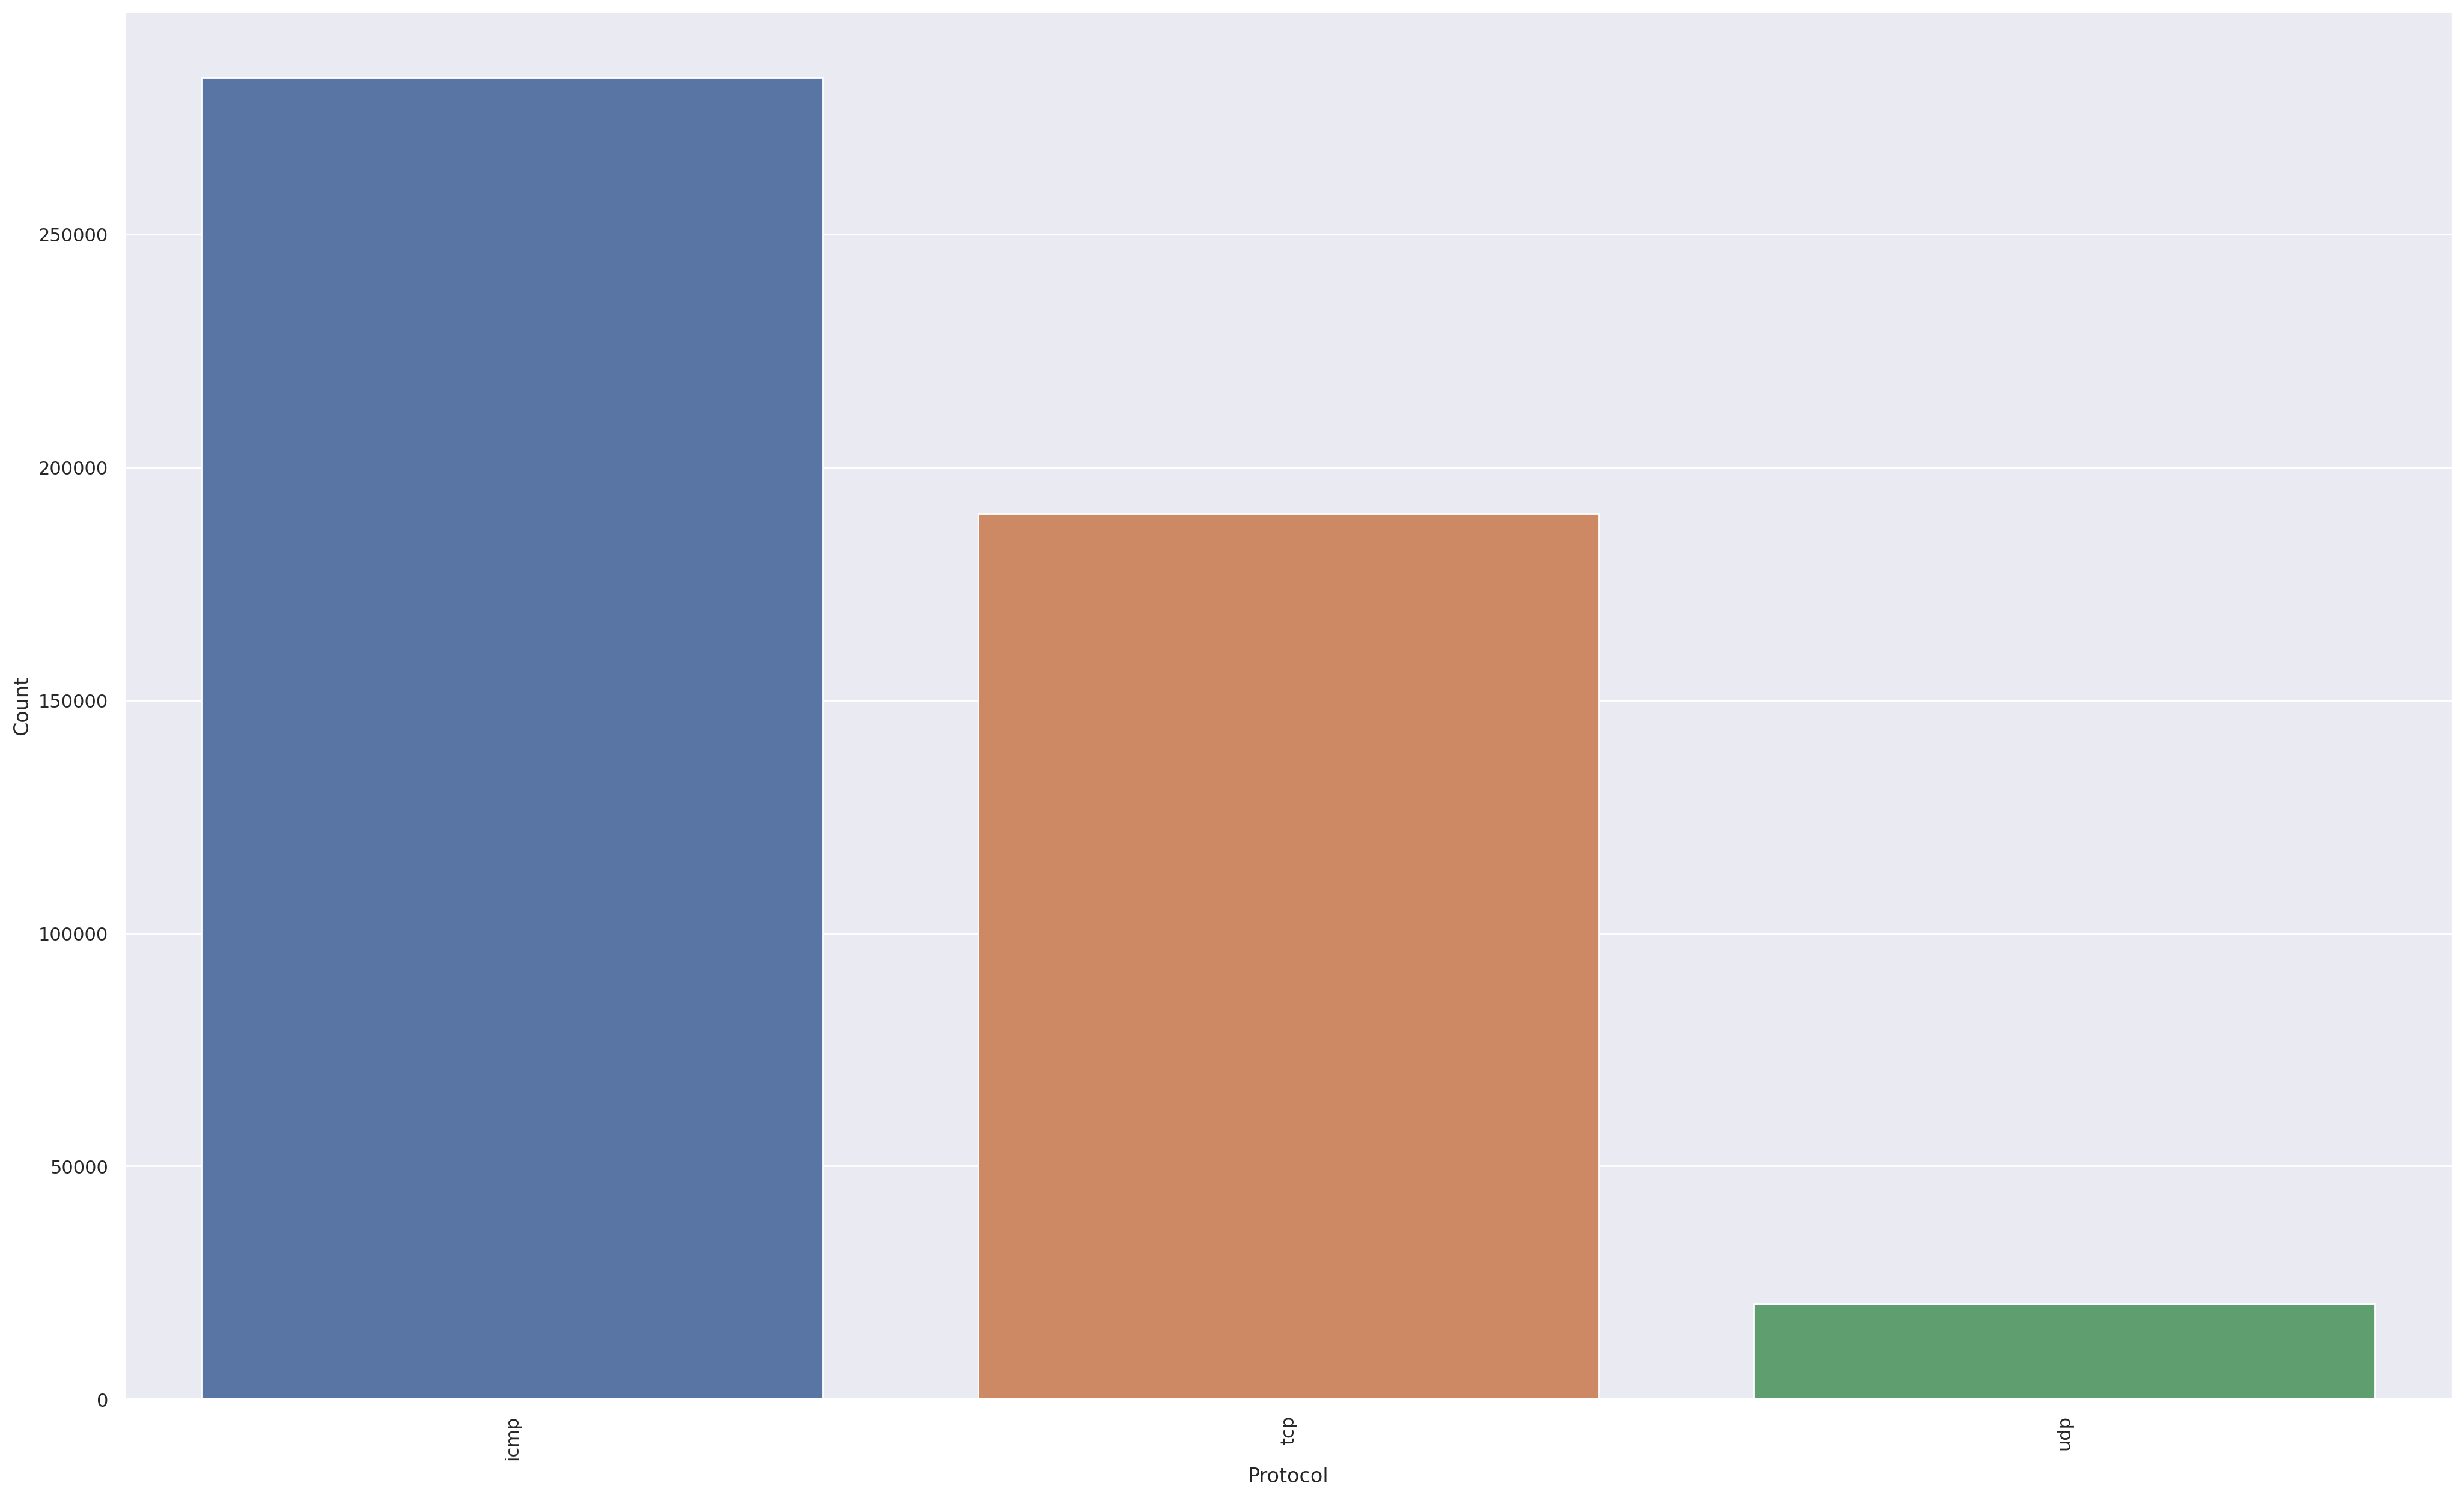

In [78]:
#visualizing protocol variable
df2 = pd.DataFrame(columns = ['Protocol']) # To create dataframe with Protocol column
df2['Protocol']=[each for each in kdd_df.protocol_type.unique()]  # To get unique values from Protocol column
df2['Count']=[len(kdd_df[kdd_df.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)
#To visualize the count of protocols of the "Protocol" column 
plt.figure(figsize=(25,15))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

From the graph we observe that icmp protocol has the highest count which is over 25000 followed by tcp with count of alomost 18000

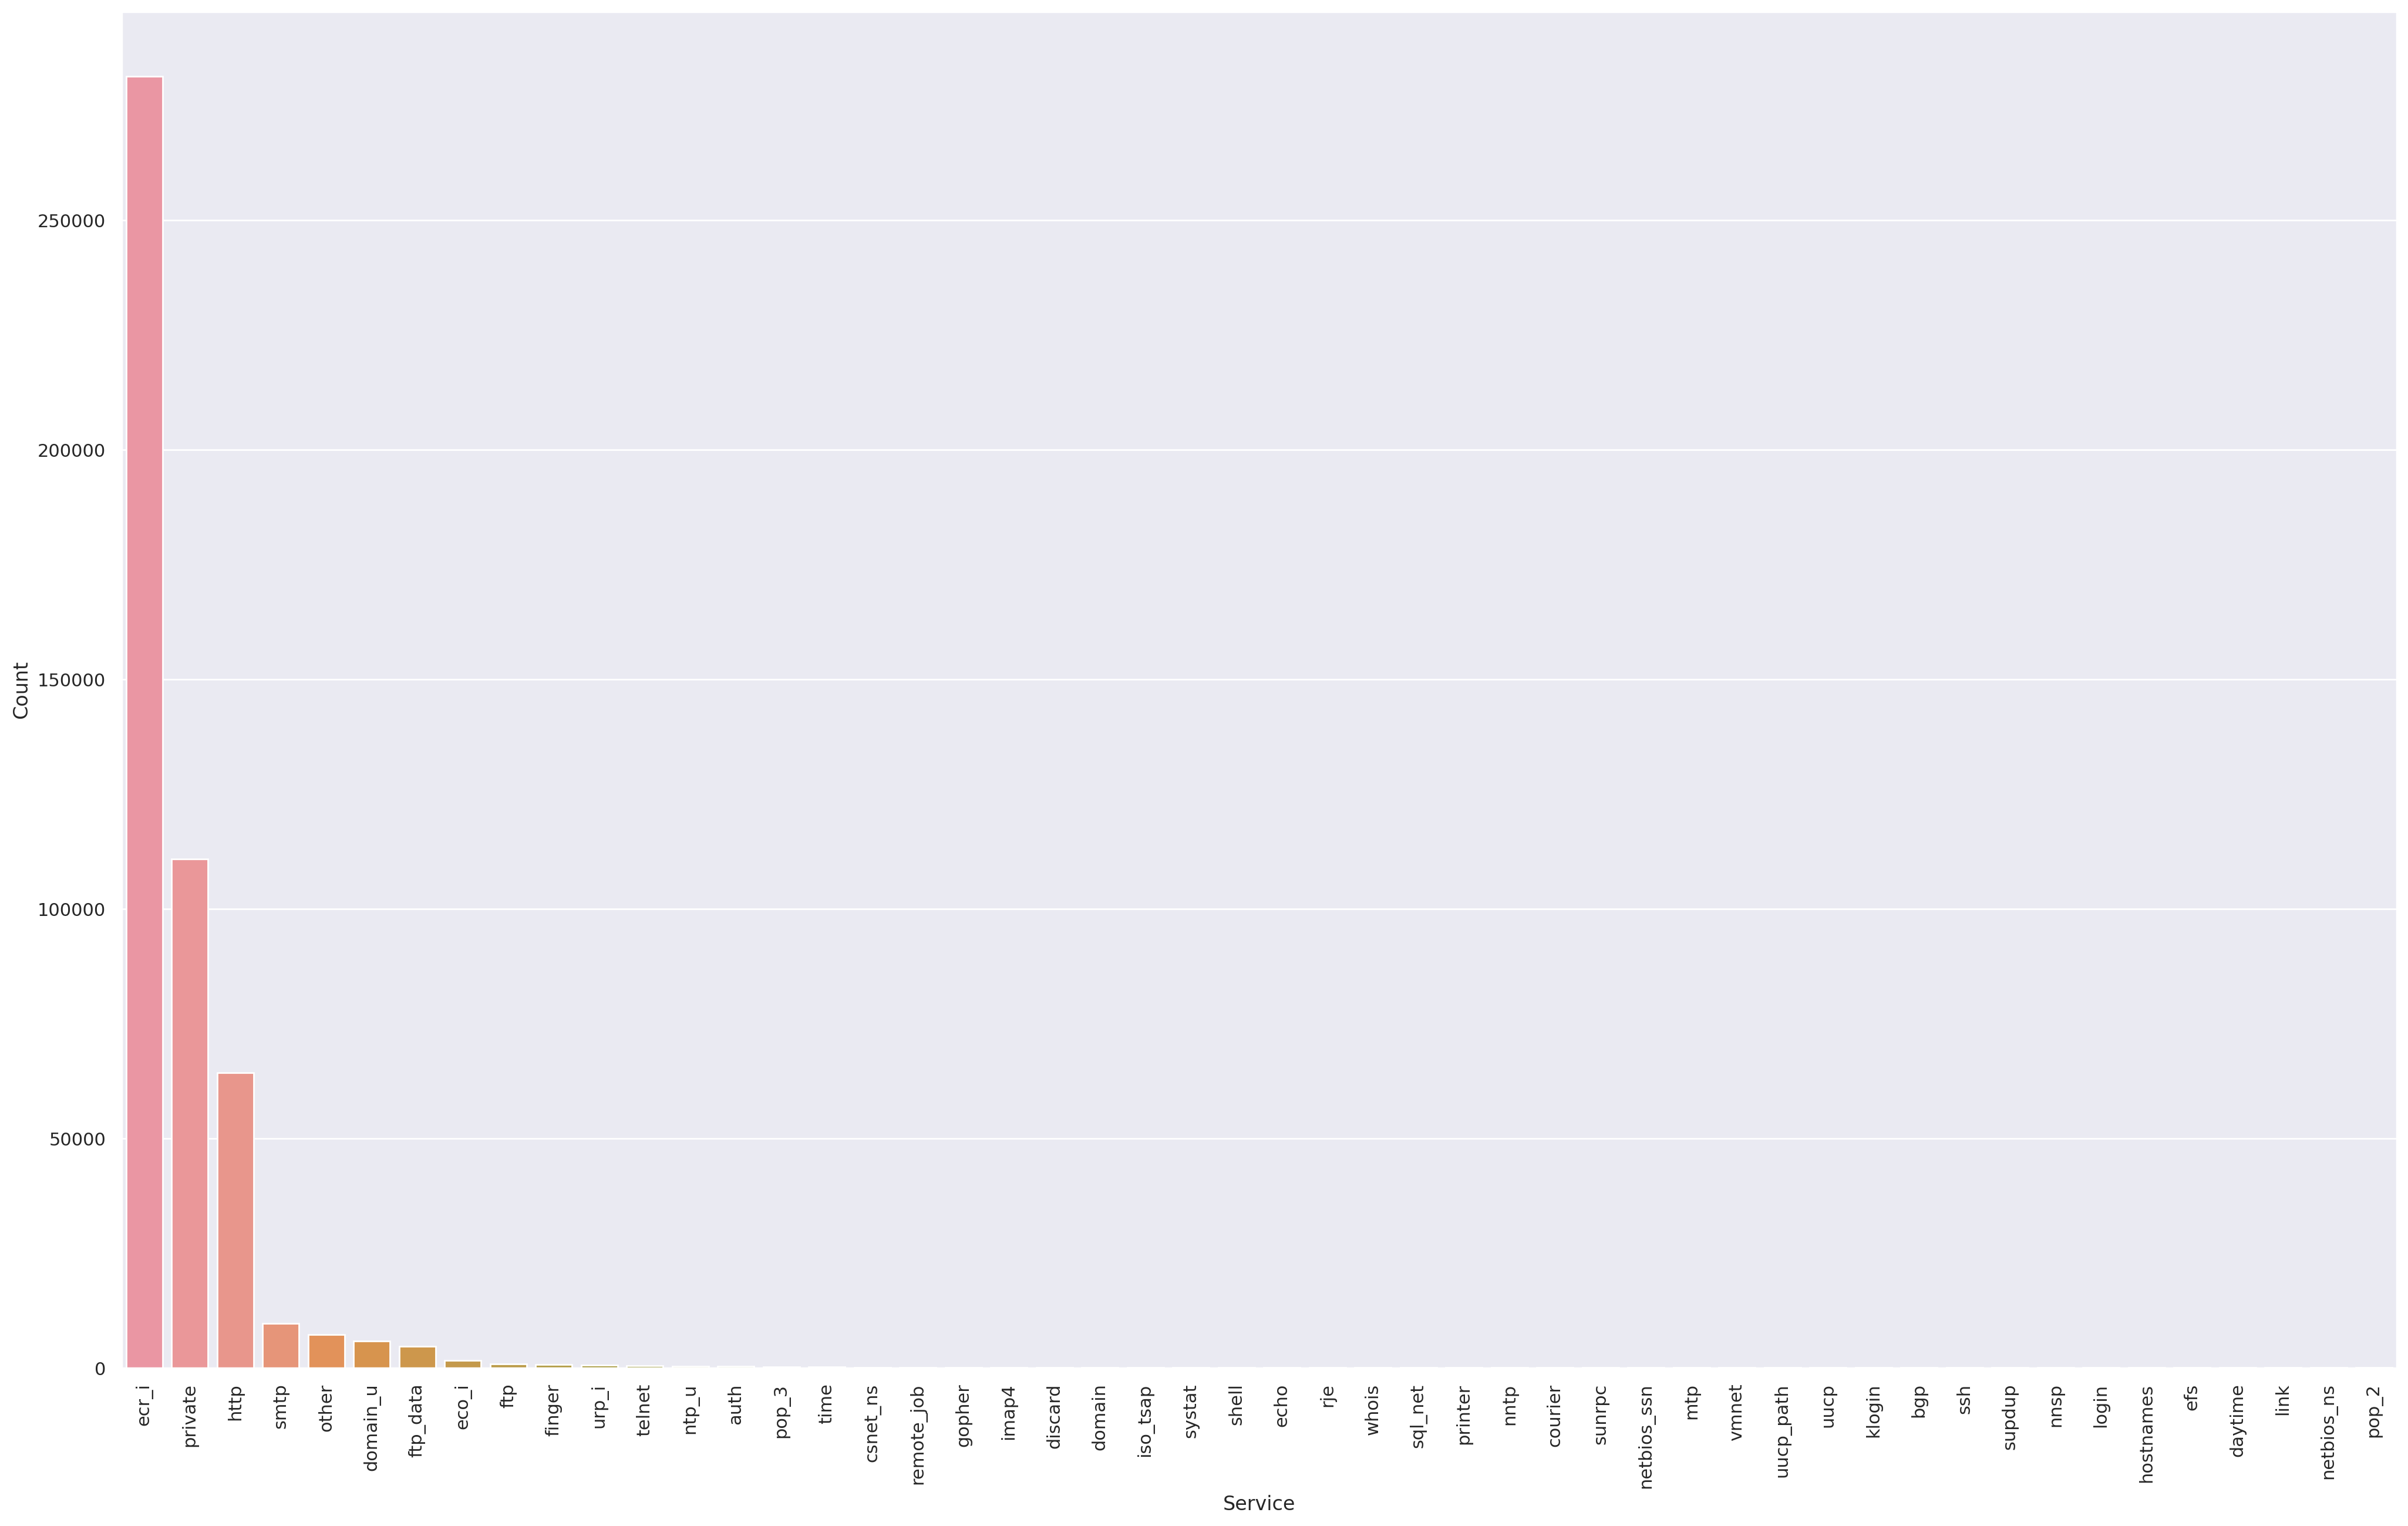

In [80]:
#visualizing Service variable
df3 = pd.DataFrame(columns = ['Service'])
df3['Service']=[each for each in kdd_df.service.unique()]
df3['Count']=[len(kdd_df[kdd_df.service==each]) for each in df3.Service]
df3=df3.sort_values(by=['Count'],ascending=False)
#To visualize the count of protocols of the "Service" column
plt.figure(figsize=(25,15))
sns.barplot(x=df3.Service.head(50), y=df3.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

From the graph, we observe that ecr_i service has the highest count which is over 25000 followed by private with count of alomost 12000 and rest of the services are very less compared to there  two services.

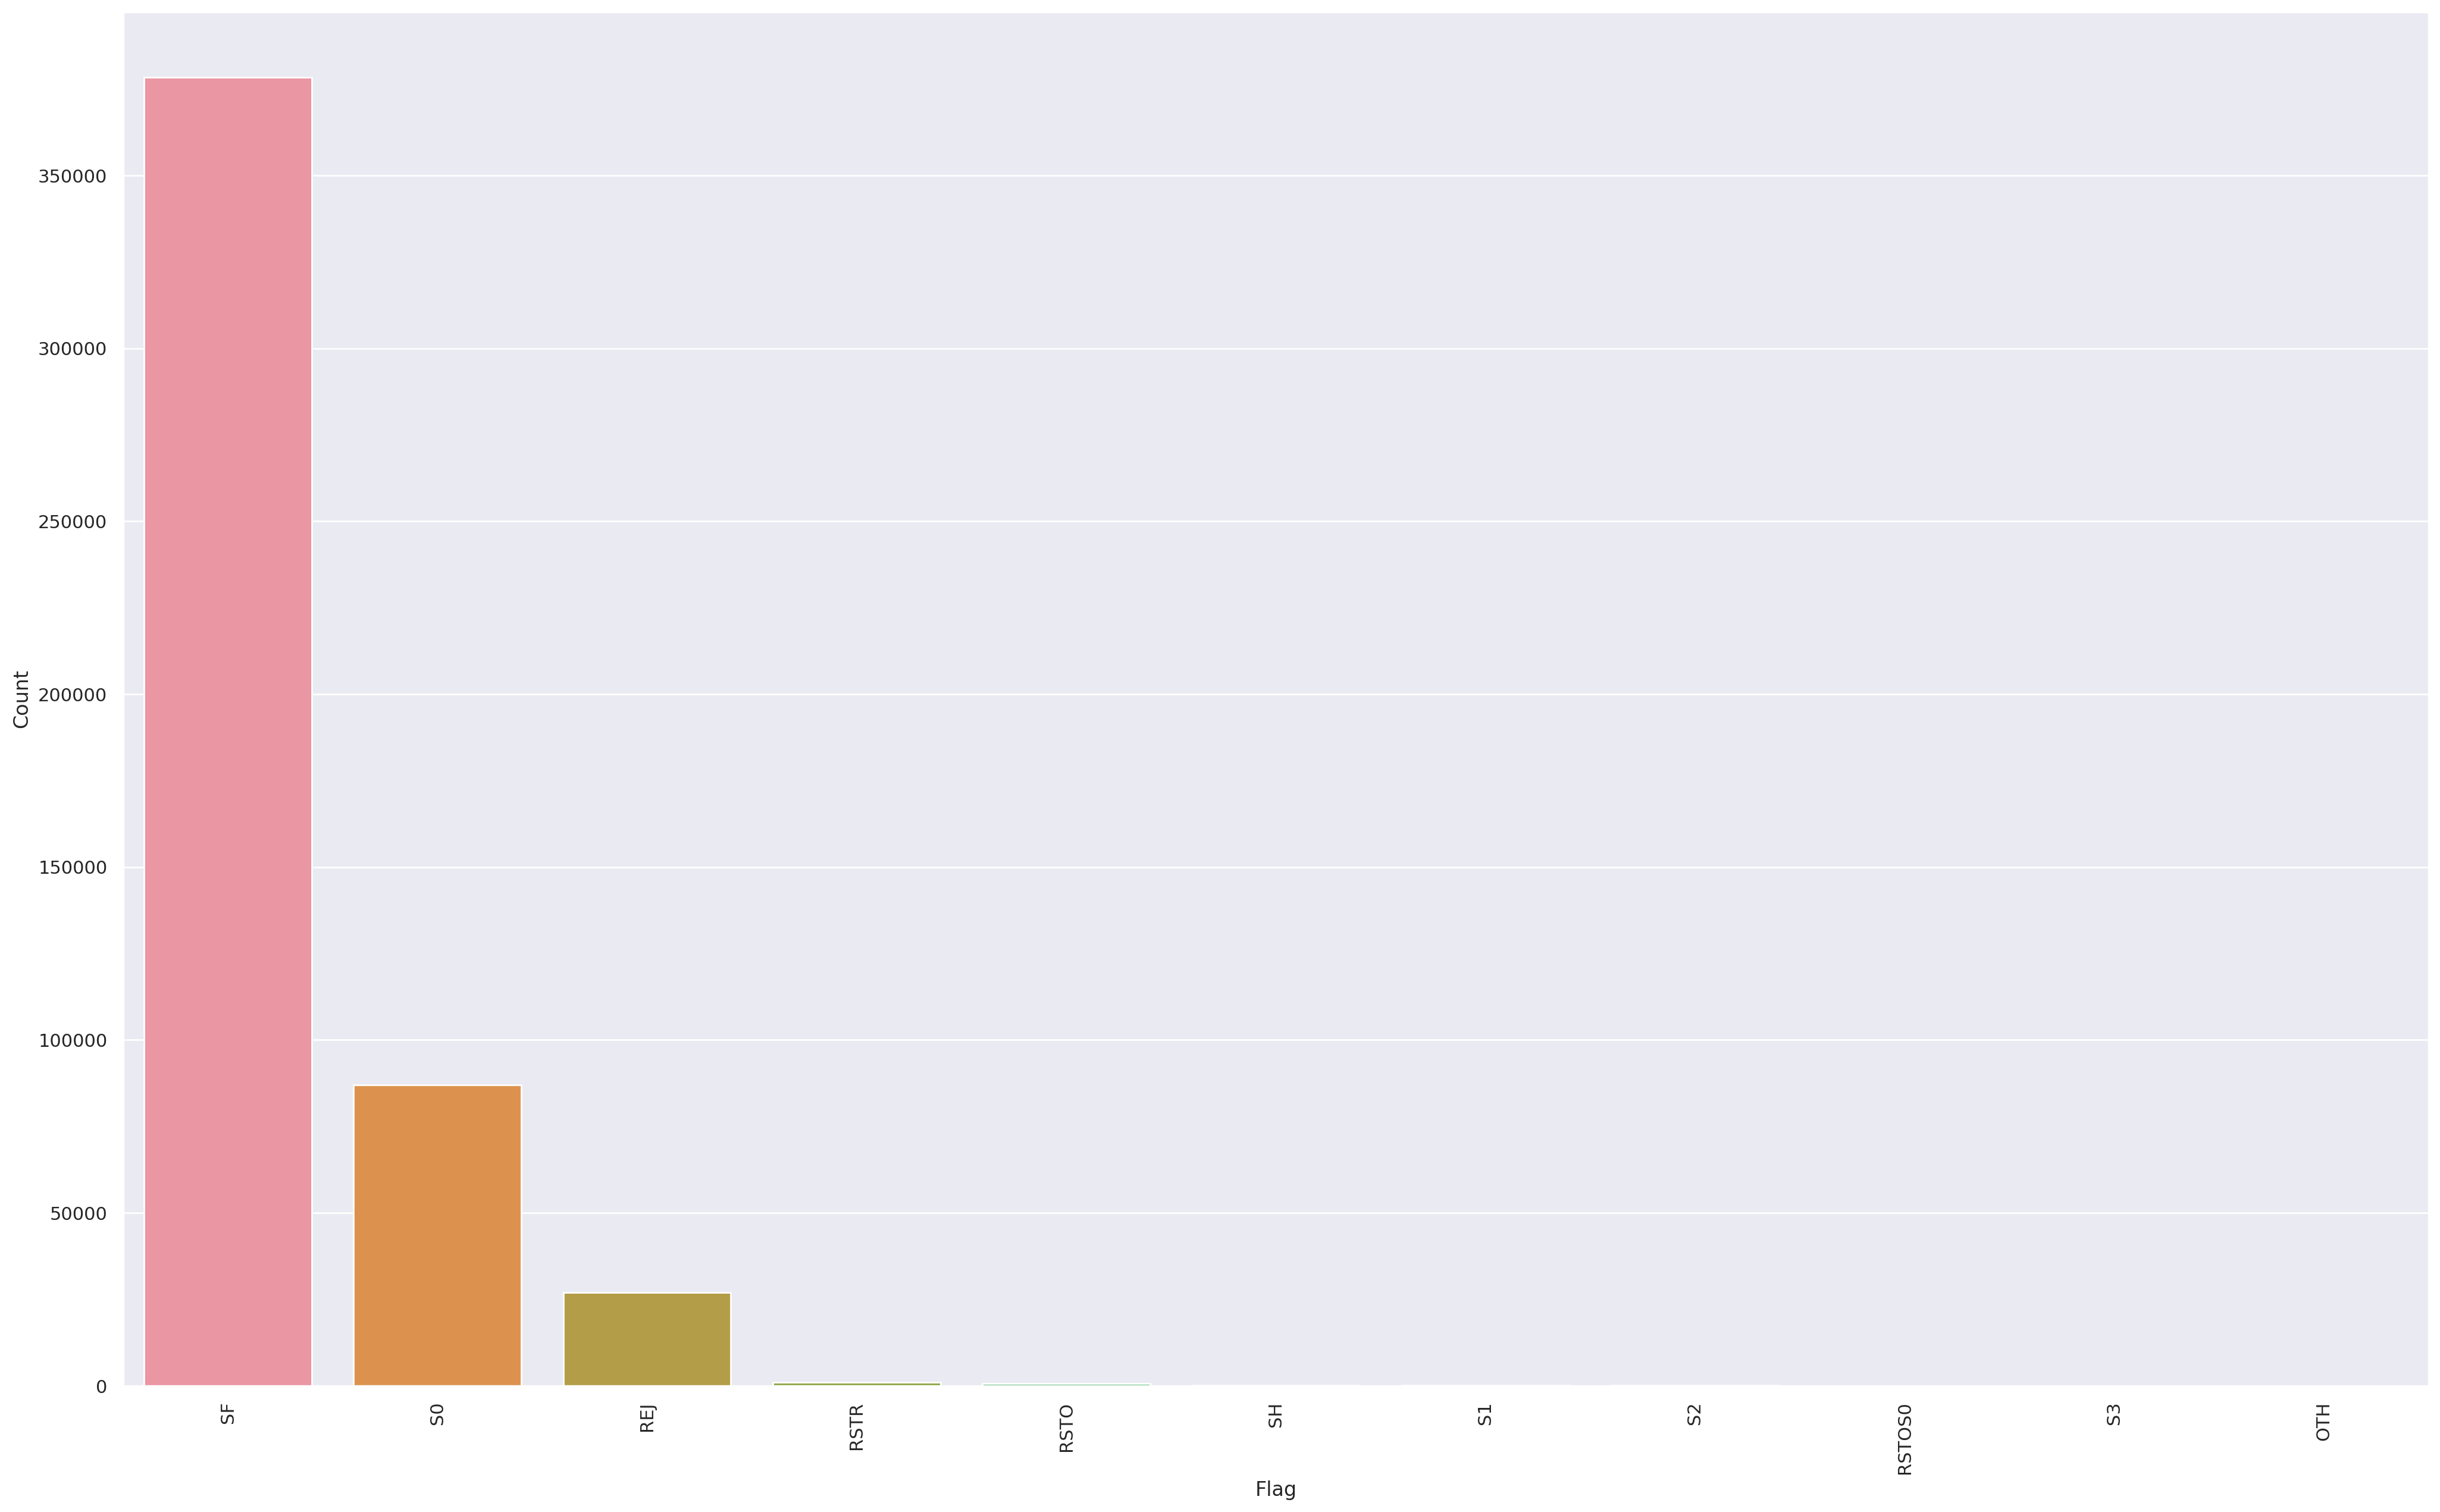

In [84]:
#Visualizing Flag variable
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in kdd_df.flag.unique()]
df4['Count']=[len(kdd_df[kdd_df.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)
#to visualize the column flag
plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

From the graph we can see that SF flag type has the highest count.

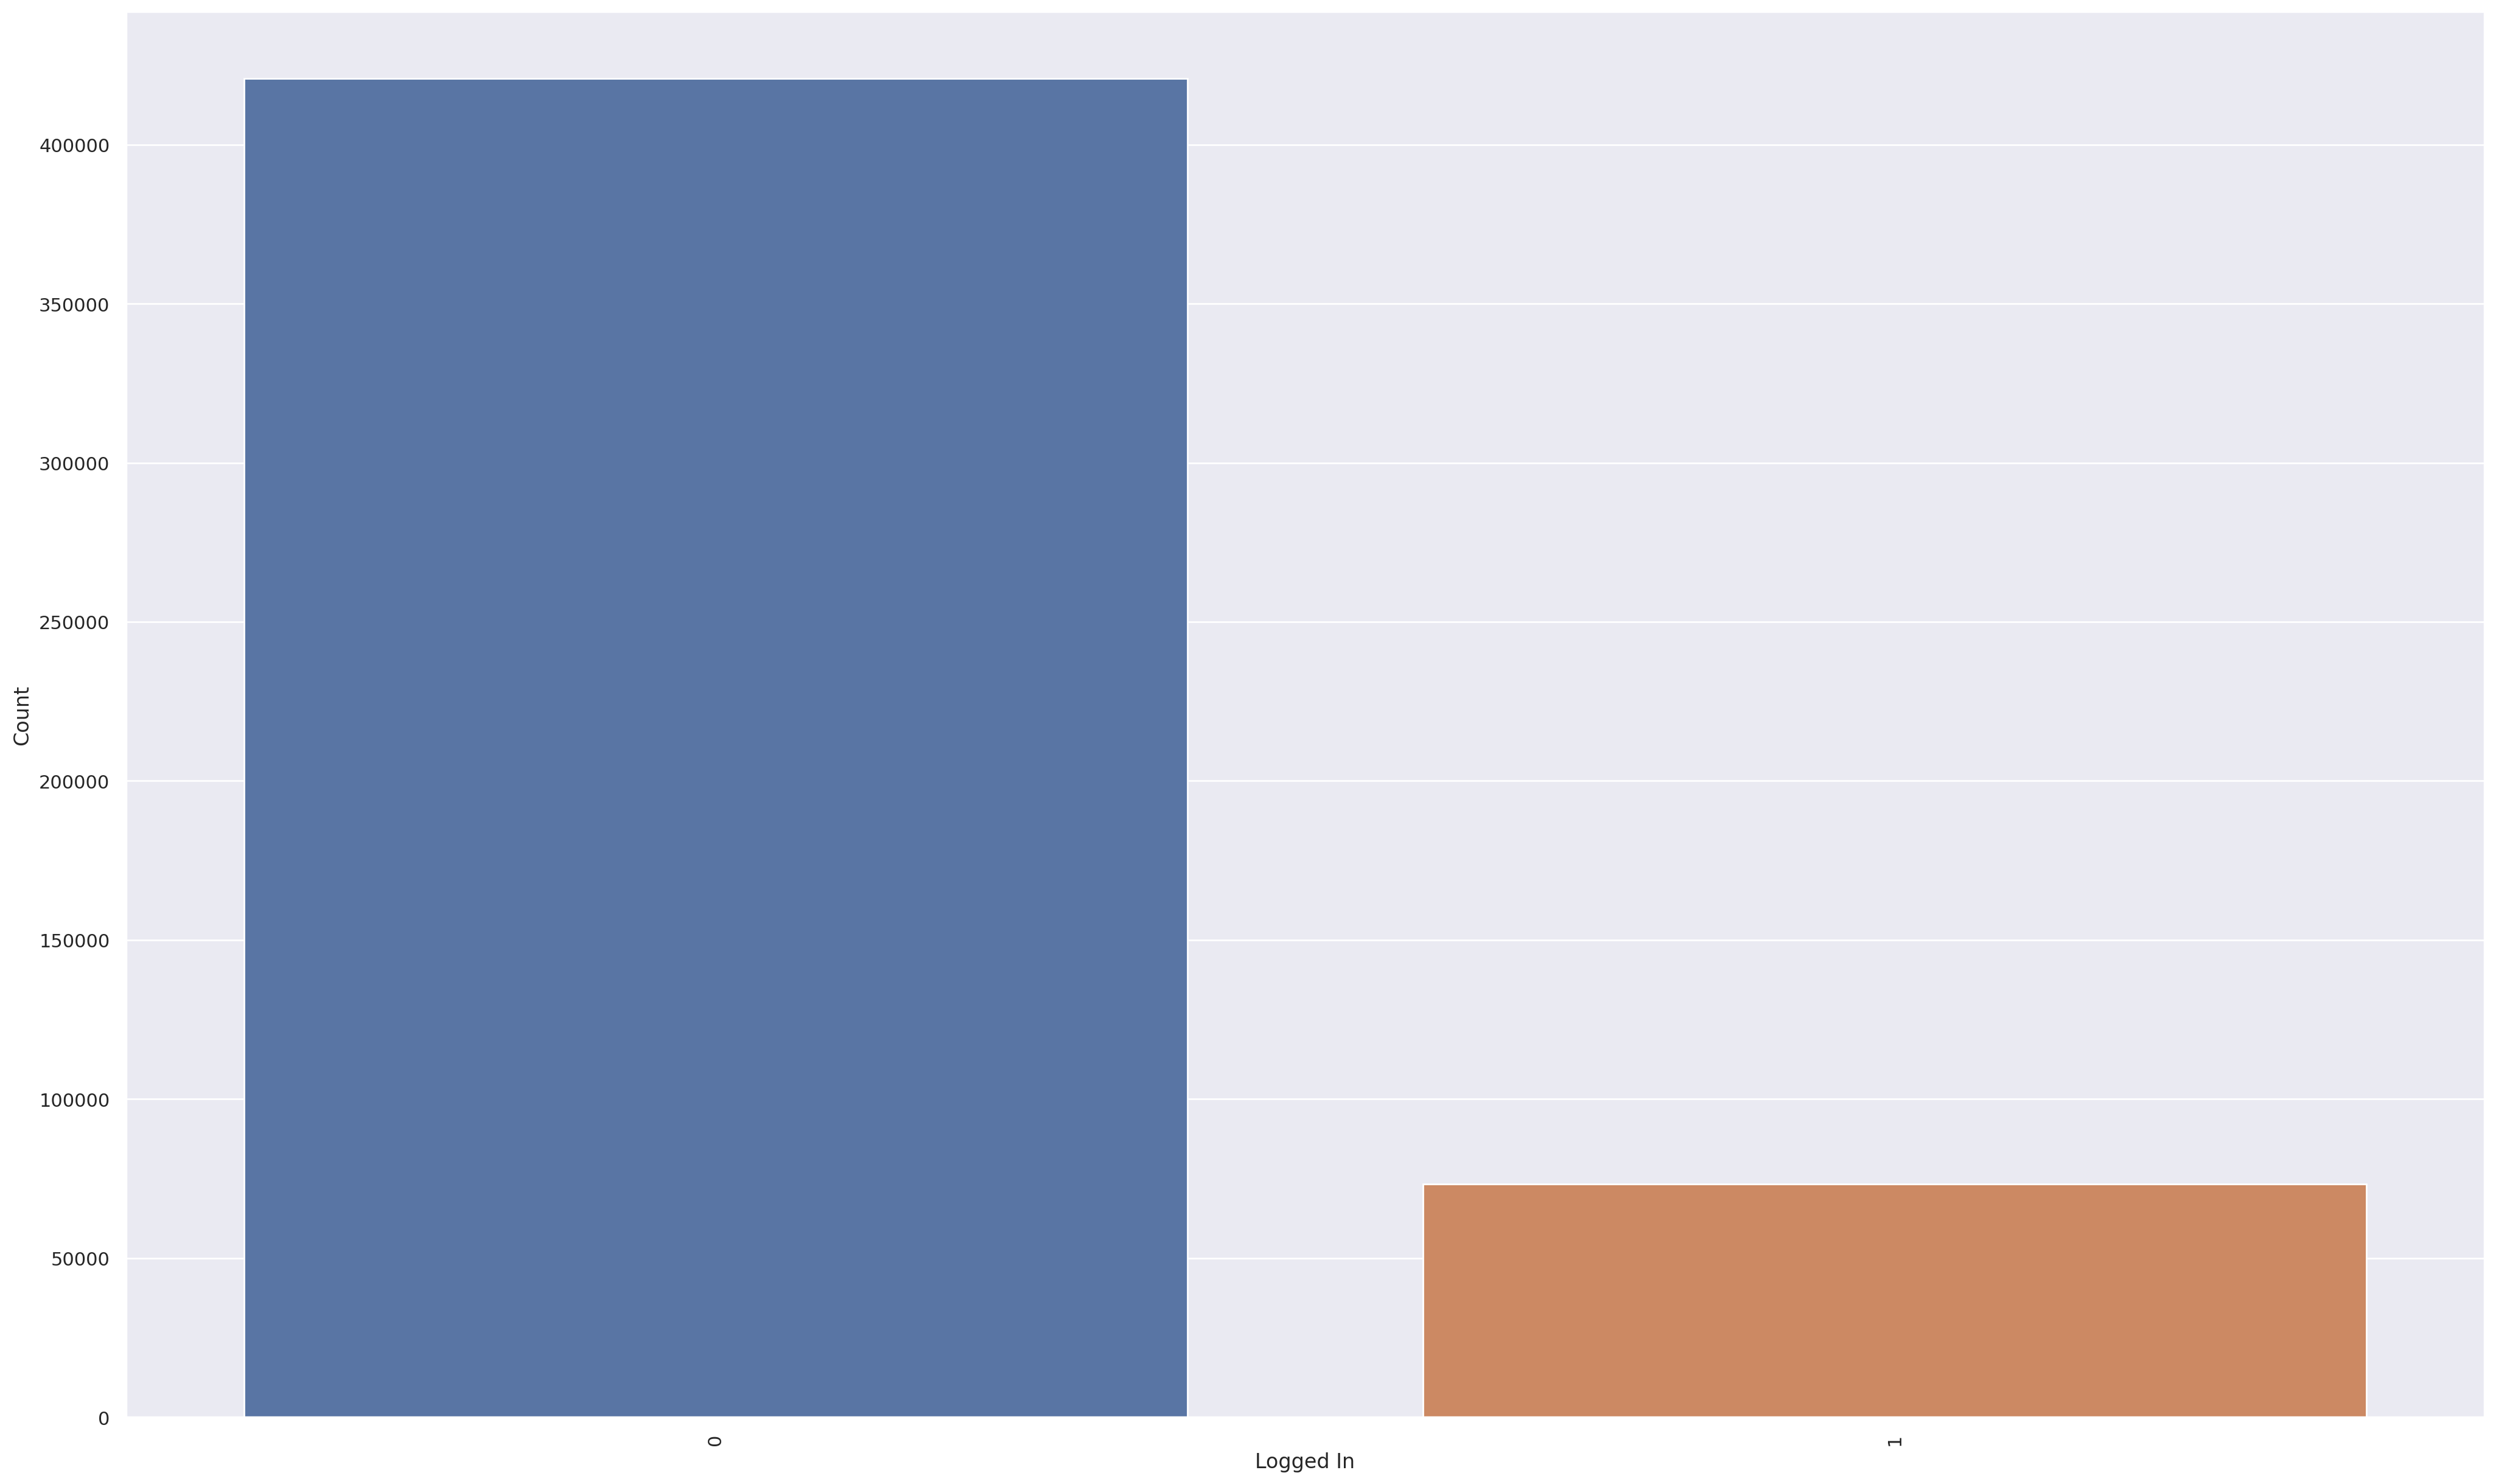

In [85]:
#visualizing Logged in column
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in kdd_df.logged_in.unique()]
df5['Count']=[len(kdd_df[kdd_df.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)
#to visualize the column logged in
plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

From the graph we can observe that 0 in Logged In have the maximum count.

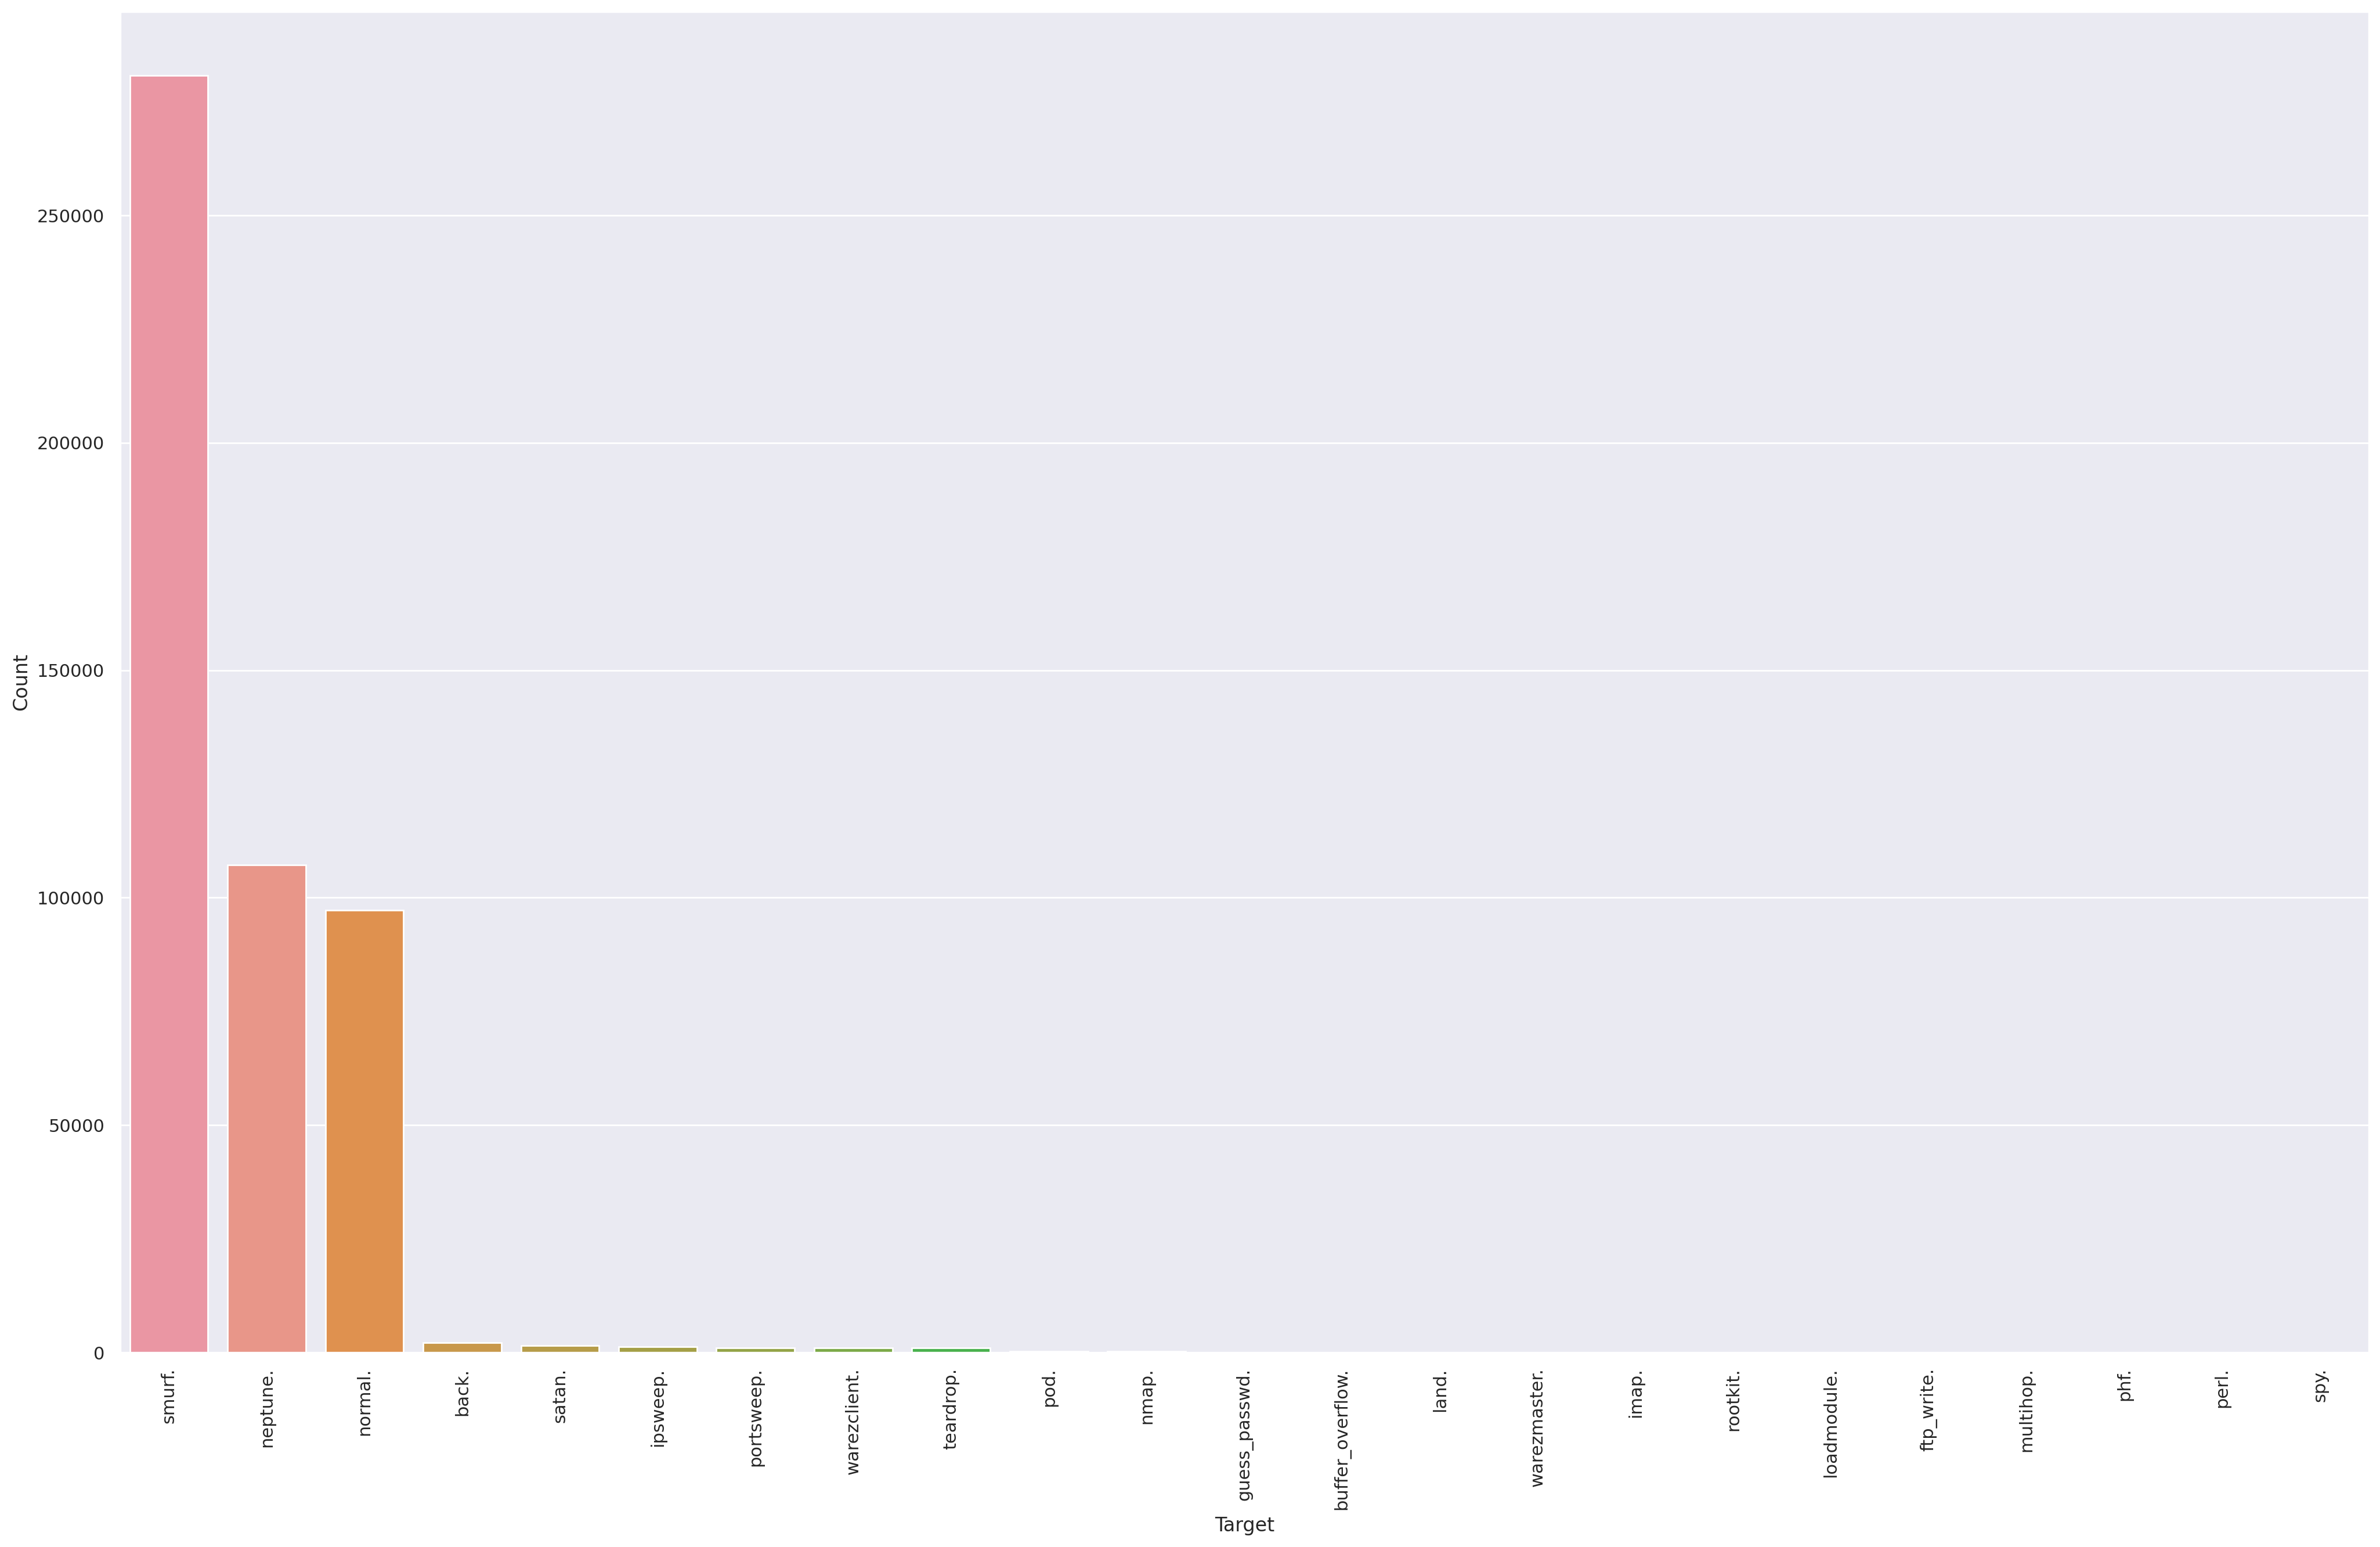

In [86]:
#visualizing target variable
df6 = pd.DataFrame(columns = ['Target'])
df6['Target']=[each for each in kdd_df.target.unique()]
df6['Count']=[len(kdd_df[kdd_df.target==each]) for each in df6.Target]
df6=df6.sort_values(by=['Count'],ascending=False)
#to visualize the column target
plt.figure(figsize=(25,15))
sns.barplot(x=df6.Target.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

from the graph we can see that smurf in target column has maximum count followed neptune and normal.

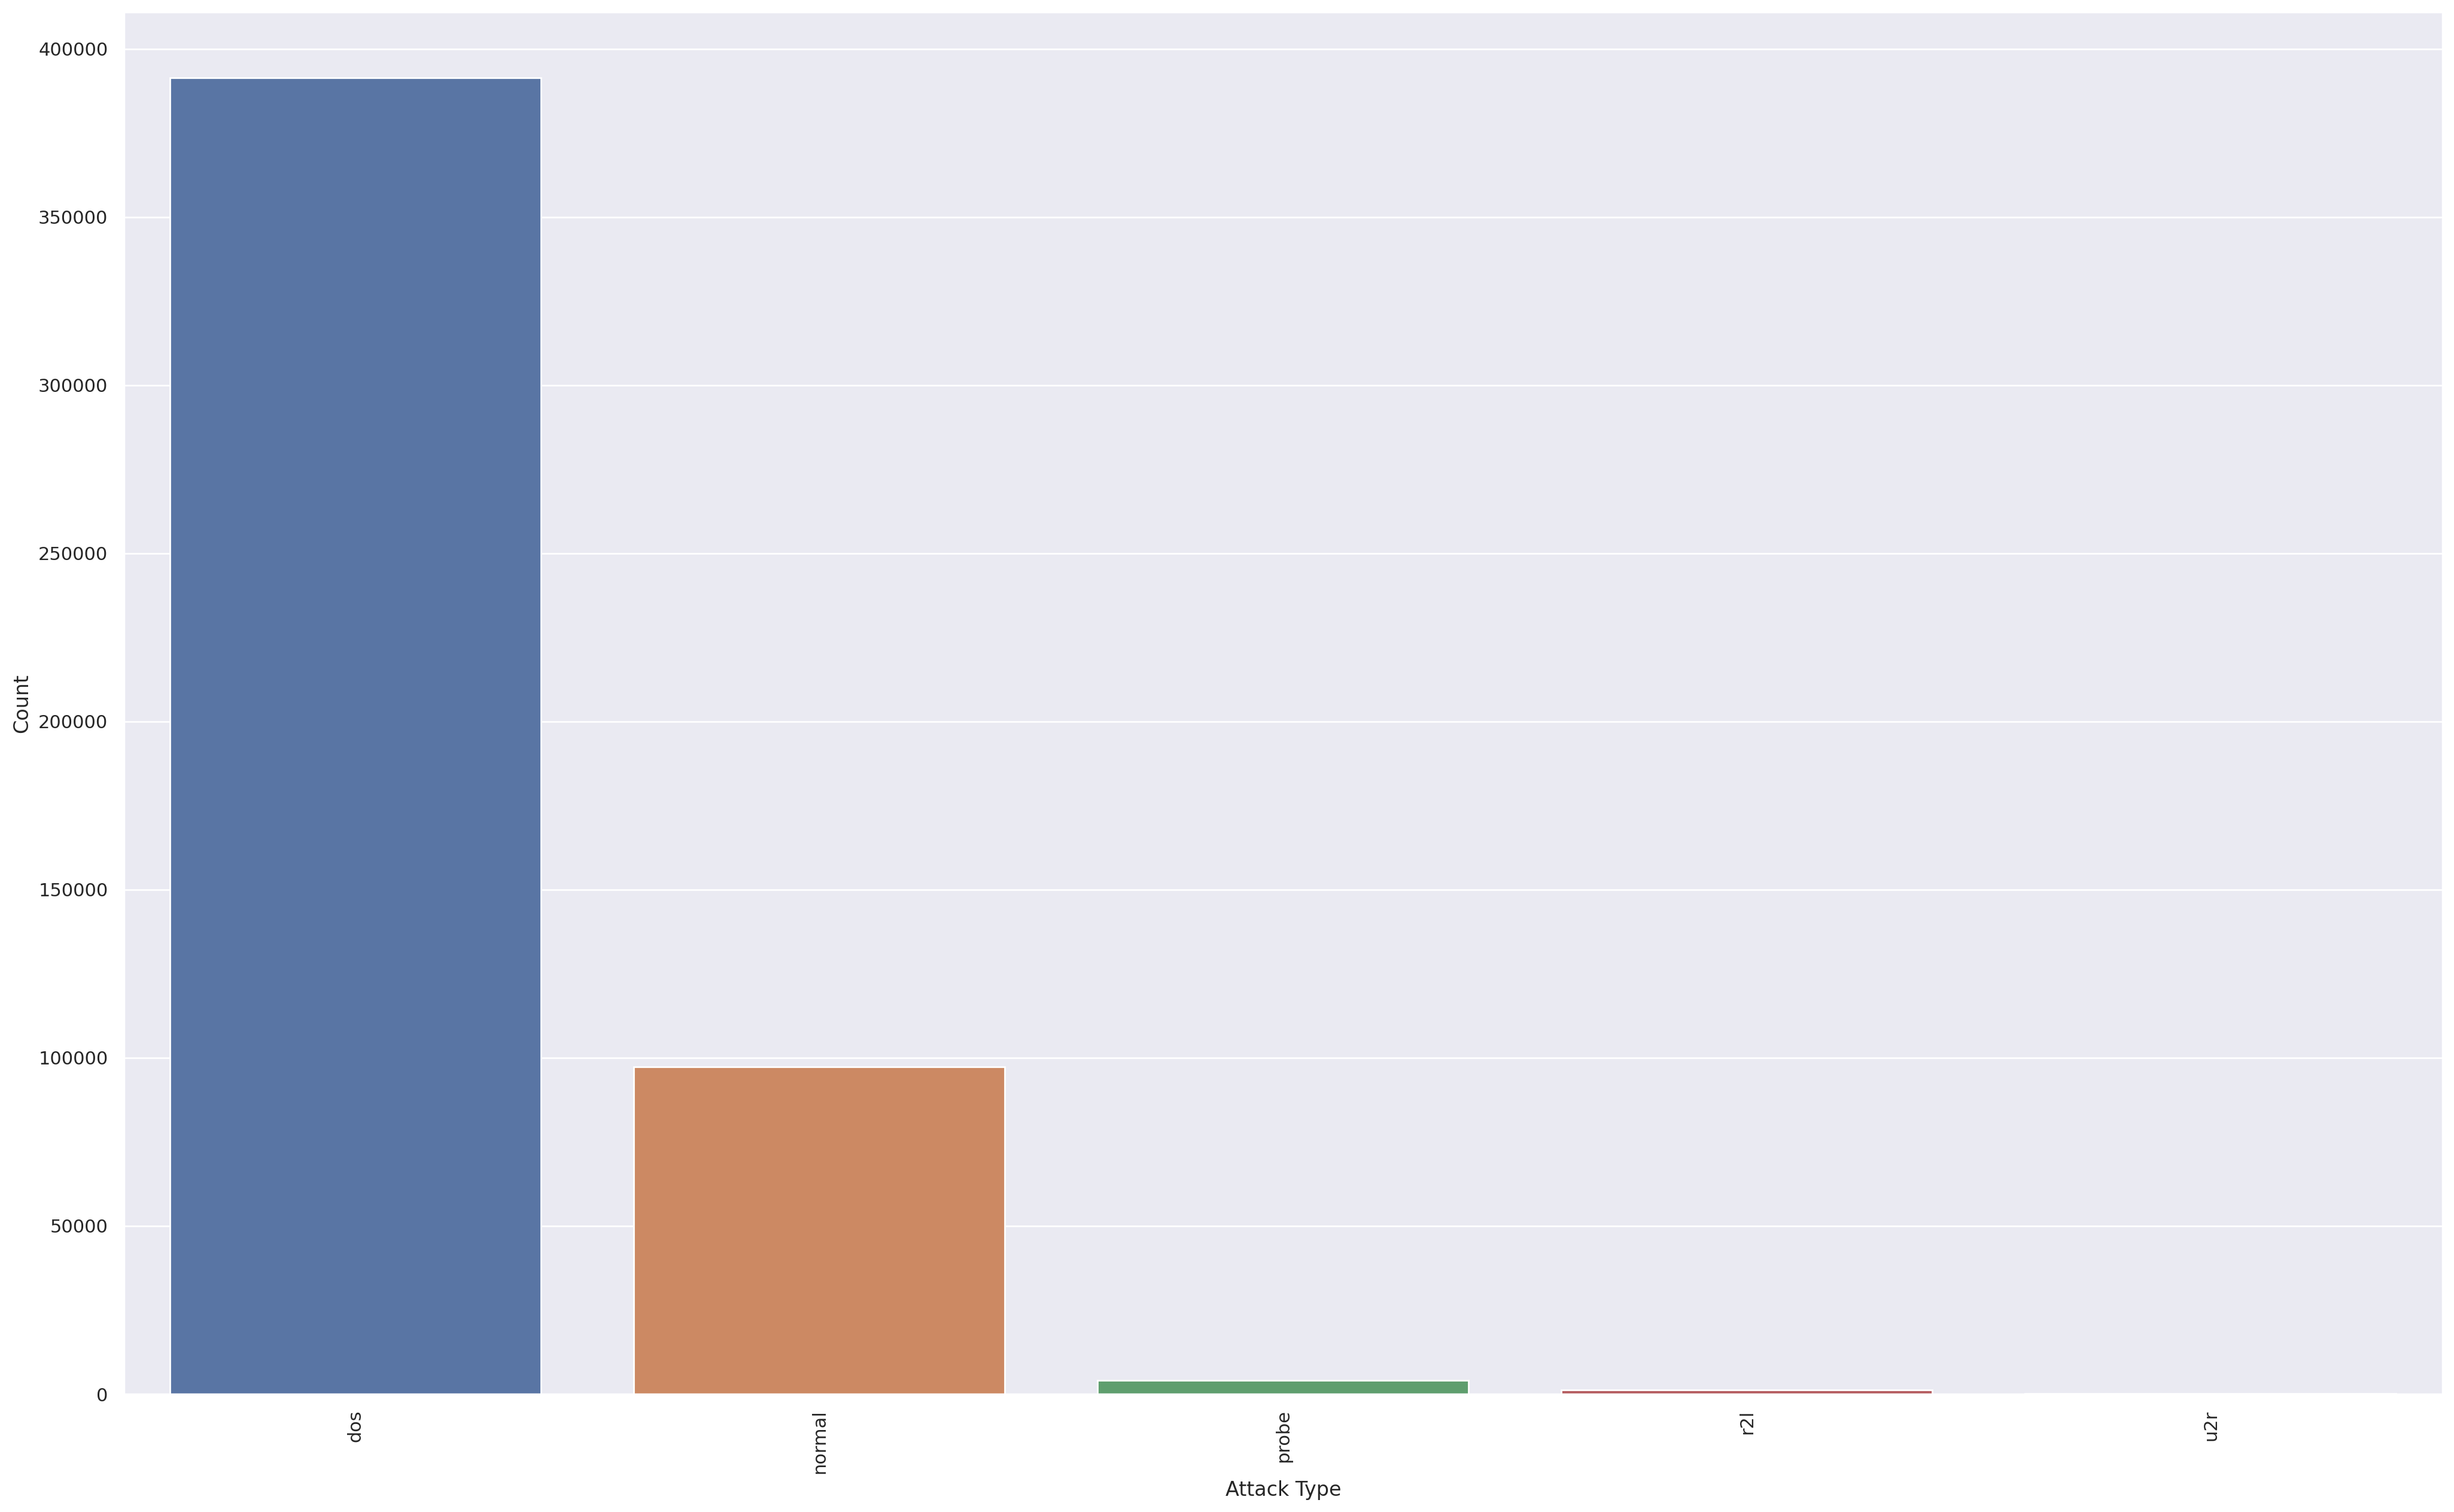

In [87]:
#visualizing attack type
df7 = pd.DataFrame(columns = ['Attack_Type'])
df7['Attack_Type']=[each for each in kdd_df.Attack_Type.unique()]
df7['Count']=[len(kdd_df[kdd_df.Attack_Type==each]) for each in df7.Attack_Type]
df7=df7.sort_values(by=['Count'],ascending=False)
#to visualize the column attack type
plt.figure(figsize=(25,15))
sns.barplot(x=df7.Attack_Type.head(50), y=df7.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

From the graph we can see that dop attack type has the maximum count followed by normal.

**Dimension Reduction**

Performing dimensionality reduction to remove the predictors that are highly correalted in order to avoid bias while classifying

<ipython-input-89-5cbf1f09794d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  kdd_df = kdd_df.dropna('columns') # Droping columns with NaN
<ipython-input-89-5cbf1f09794d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kdd_df.corr()


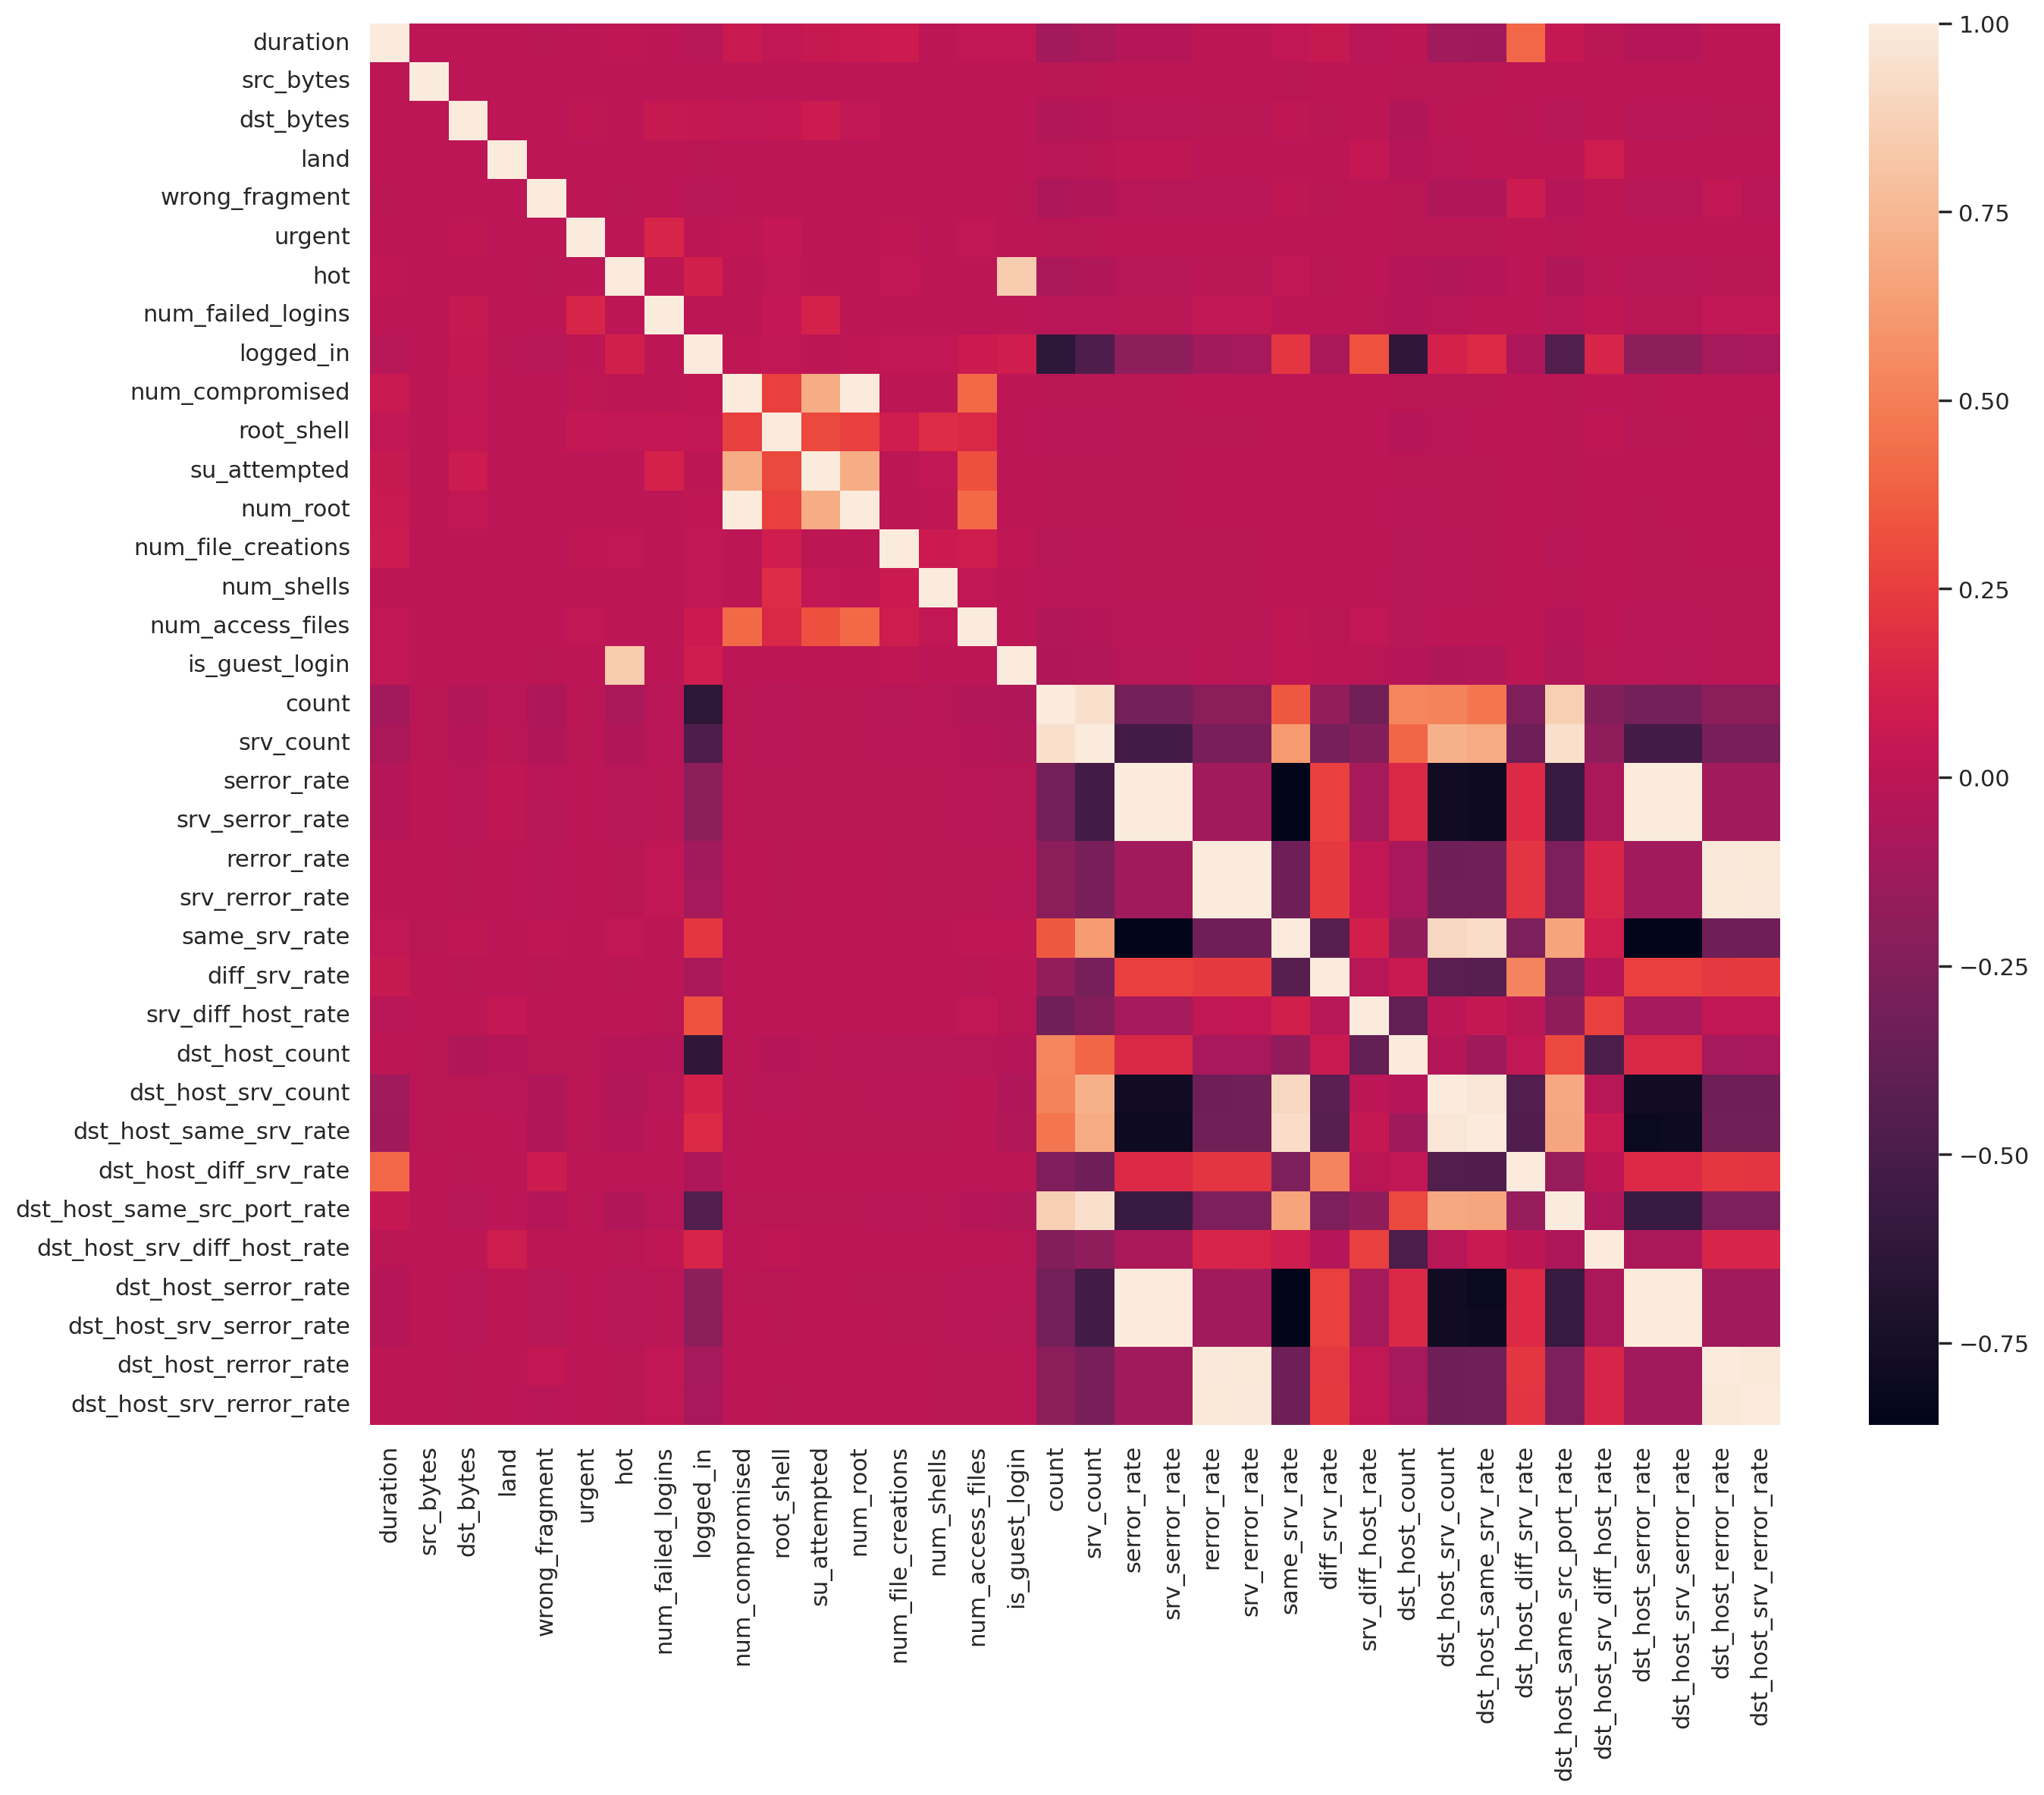

In [89]:
#finding correlation between variables

kdd_df = kdd_df.dropna('columns') # Droping columns with NaN

kdd_df = kdd_df[[col for col in kdd_df if kdd_df[col].nunique() > 1]] # Keeping columns where there are more than 1 unique values

corr = kdd_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)#plotting the correlation map

plt.show()

Finding correlation coefficients of highly correlated variables


In [90]:
kdd_df['num_root'].corr(kdd_df['num_compromised'])#finding the correlation coeff between num_root and num_compromised

0.9938277978737916

In [91]:
kdd_df['srv_serror_rate'].corr(kdd_df['serror_rate'])#finding the correlation srv_serror_rate and serror_rate

0.998361507272553

In [92]:
kdd_df['srv_count'].corr(kdd_df['count'])#finding the correlation srv_count and count

0.9436670688882645

In [93]:
kdd_df['srv_rerror_rate'].corr(kdd_df['rerror_rate'])#finding the correlation srv_rerror_rate and srrror_rate

0.9947309539818242

In [94]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['dst_host_srv_count'])#finding the correlation dst_host_same_srv_rate and dst_host_srv_count

0.9736854572953835

In [95]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['dst_host_serror_rate'])#finding the correlation dst_host_srv_serror_rate and dst_host_serror_rate

0.9981559173373293

In [96]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['dst_host_rerror_rate'])#finding the correlation dst_host_srv_rerror_rate and dst_host_rerror_rate

0.9848038371110285

In [97]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['same_srv_rate'])#finding the correlation dst_host_same_srv_rate and same_srv_rate

0.9278080342690969

In [99]:
kdd_df['dst_host_srv_count'].corr(kdd_df['same_srv_rate'])#finding the correlation same_srv_rate and dst_host_srv_count

0.8989546630323716

In [98]:
kdd_df['dst_host_same_src_port_rate'].corr(kdd_df['srv_count'])#finding the correlation dst_host_same_src_port_rate and srv_count

0.944926367678324

In [100]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['serror_rate'])#finding the correlation dst_host_serror_rate and serror_rate

0.9986729680104371

In [101]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['srv_serror_rate'])#finding the correlation dst_host_serror_rate and srv_serror_rate

0.9978353003739603

In [102]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['serror_rate'])#finding the correlation dst_host_srv_serror_rate and serror_rate

0.997849248567986

In [103]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['srv_serror_rate'])#finding the correlation dst_host_srv_serror_rate and srv_serror_rate

0.999304109185027

In [104]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['rerror_rate'])#finding the correlation dst_host_rerror_rate and rerror_rate

0.986994792495618

In [105]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['srv_rerror_rate'])#finding the correlation dst_host_rerror_rate and srv_rerror_rate

0.9821663427308264

In [106]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['rerror_rate'])#finding the correlation dst_host_srv_rerror_rate and rerror_rate

0.9851995540751695

In [107]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['srv_rerror_rate'])#finding the correlation dst_host_srv_rerror_rate and srv_rerror_rate

0.9865705438845764

In [108]:
# Droping highly correlated variables 
kdd_df.drop('num_root',axis = 1,inplace = True)
kdd_df.drop('srv_serror_rate',axis = 1,inplace = True)
kdd_df.drop('srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# droping service because its no use
kdd_df.drop('service',axis = 1, inplace=True)

In [109]:
kdd_df.info()#finding the info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   flag                         494021 non-null  object 
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [111]:
kdd_df.shape

(494021, 32)

After performing the dimensionality reduction the shape of the dataset is reduced to (494021, 32)

In [110]:
kdd_df.describe()#describing the dataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,0.176687,0.057433,0.791547,0.020982,0.028997,232.470778,188.665670,0.030906,0.601935,0.006684
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,0.380717,0.231623,0.388189,0.082205,0.142397,64.745380,106.040437,0.109259,0.481309,0.042133
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.000000,1.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.040000,1.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


Feature mapping the variables protocol and flag

In [112]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
kdd_df['protocol_type'] = kdd_df['protocol_type'].map(pmap)
#icmp to 0,tcp to 1,udp to 2 

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
kdd_df['flag'] = kdd_df['flag'].map(fmap)

kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [113]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   flag                         494021 non-null  int64  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

### Model Exploration and Evaluation Metrics

In [114]:
# Splitting the dataset
kdd_df = kdd_df.drop(['target', ], axis = 1)
print(kdd_df.shape)

# Splitting between target variable and training set
y = kdd_df[['Attack_Type']]
X = kdd_df.drop(['Attack_Type', ], axis = 1)

min_max_sc = MinMaxScaler() # Transforming features by scaling each feature 
X = min_max_sc.fit_transform(X)

# Splitting dataset between training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [115]:
kdd_df['Attack_Type'].unique()#finding the unique values of column attack type

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [116]:
print("Train Data Shape{} ".format(X_train.shape))#printing the train data shape
print("Test Data Shape{} ".format(X_test.shape))#printing test data shape

Train Data Shape(395216, 30) 
Test Data Shape(98805, 30) 


In [117]:
#creating empty arrays for testing time,test accuracy and train accuracy
arr_testing_time =[]

Arr_accuracy_test =[]
Arr_accuracy_train =[]

In [118]:
# implementing Decision Tree Classifier Model


dtc = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) #Creating instance of decision tree classifier

# Training the model and calculating train and test times
start_time = time.time()
dtc.fit(X_train, y_train.values.ravel())
end_time = time.time()#getting the traing time
print("Training time: ", end_time-start_time)

# Testing the model
start_time = time.time()
y_test_pred = dtc.predict(X_train)
end_time = time.time()
test_time_DT = end_time-start_time
print("Testing time: ",test_time_DT )
arr_testing_time.append(test_time_DT)
# test and train scores
train_acc_DT = dtc.score(X_train, y_train)#getting training accuracy score
test_acc_DT = dtc.score(X_test, y_test)#getting testing accuracy score
print("Train score is:",train_acc_DT )
print("Test score is:",test_acc_DT )
Arr_accuracy_test.append(test_acc_DT)#appending to the array Arr_accuracy_test
Arr_accuracy_train.append(train_acc_DT)#appending to the array Arr_accuracy_train

Training time:  1.7724366188049316
Testing time:  0.07998299598693848
Train score is: 0.9905747743006356
Test score is: 0.9905470370932645


In [119]:
print(arr_testing_time)
print(Arr_accuracy_test)
print(Arr_accuracy_train)

[0.07998299598693848]
[0.9905470370932645]
[0.9905747743006356]


In [120]:
# Making predictions on the test set
y_test_pred = dtc.predict(X_test)

# Generating classification report
report = classification_report(y_test, y_test_pred)
print(report)#printing the report

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       0.98      0.98      0.98     19353
       probe       0.56      0.88      0.69       850
         r2l       0.00      0.00      0.00       235
         u2r       0.00      0.00      0.00        12

    accuracy                           0.99     98805
   macro avg       0.51      0.57      0.53     98805
weighted avg       0.99      0.99      0.99     98805



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# Making predictions on the test set
y_test_pred = dtc.predict(X_test)

#  confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[78171   142    42     0     0]
 [    1 18951   401     0     0]
 [    6    95   749     0     0]
 [    0    95   140     0     0]
 [    0    12     0     0     0]]


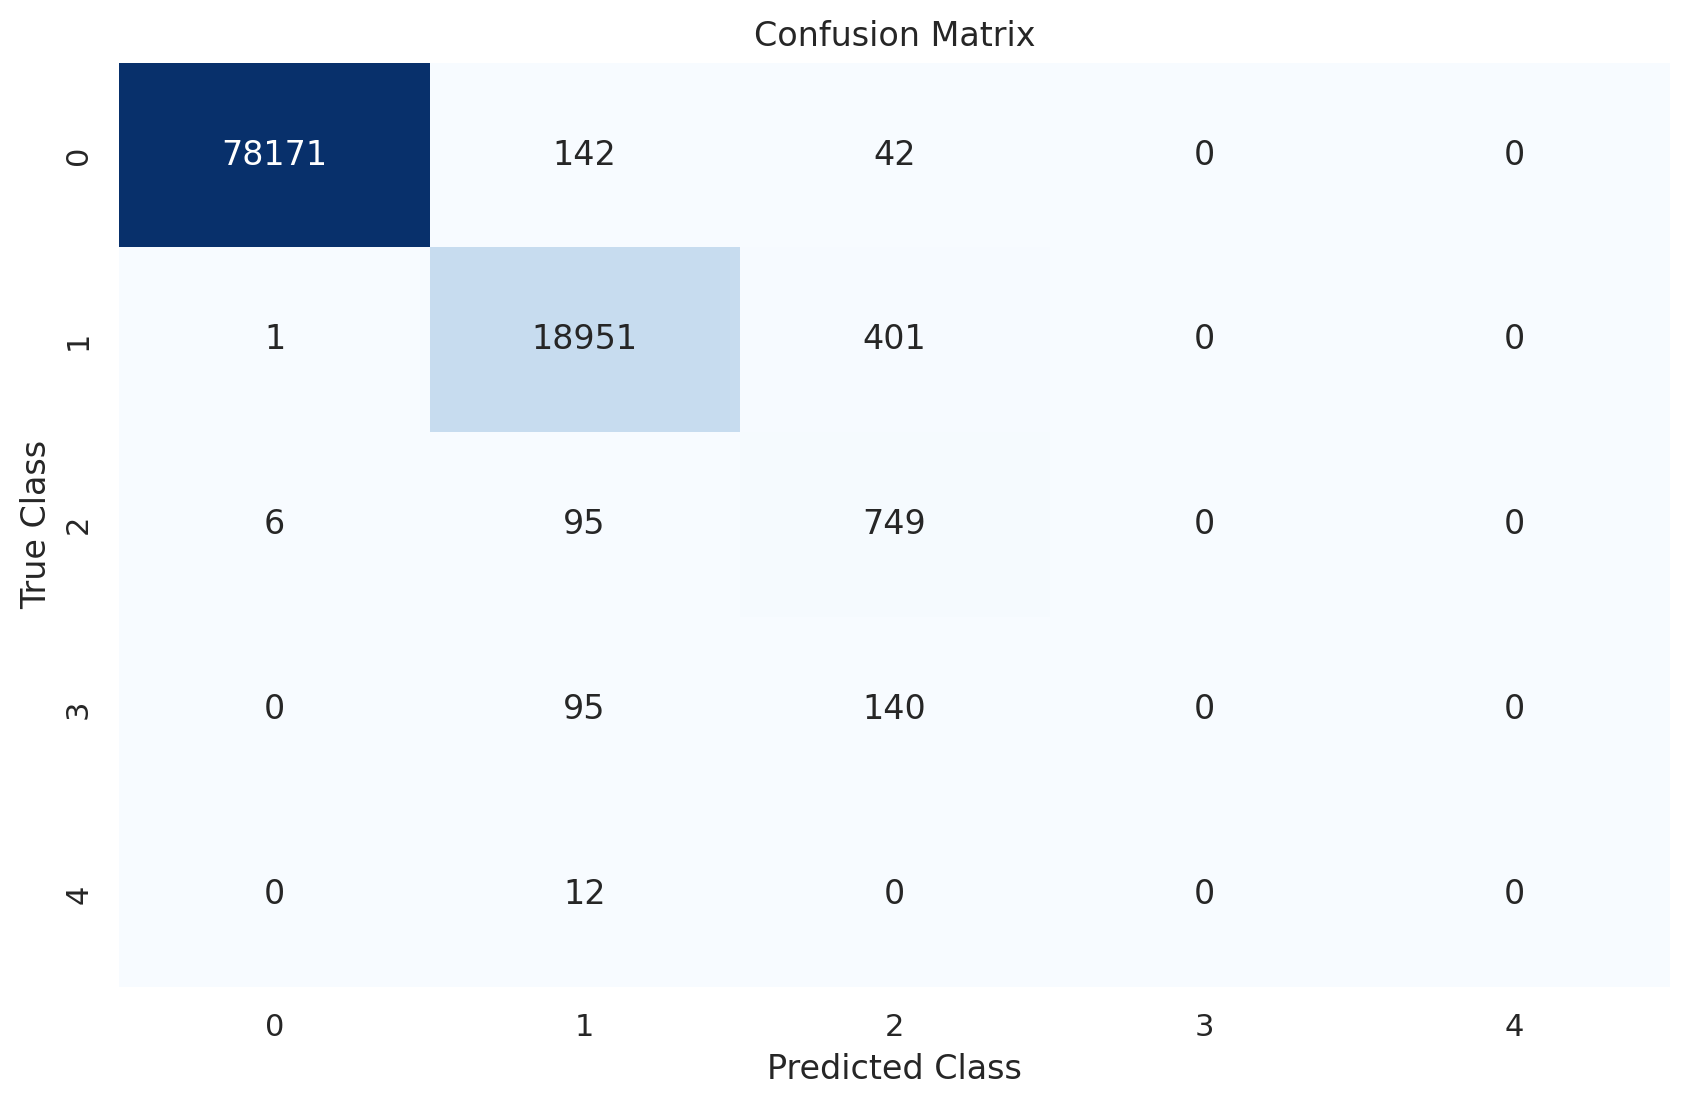

In [122]:
# heatmap of the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.show()#printing the confusion matrix

In [157]:
n_classes = len(np.unique(kdd_df[['Attack_Type']]))
n_classes

5

In [158]:
y_sc = dtc.fit(X_train, y_train.values.ravel()).predict_proba(X_test)

In [159]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(98805, 5)

In [160]:
from sklearn.metrics import RocCurveDisplay

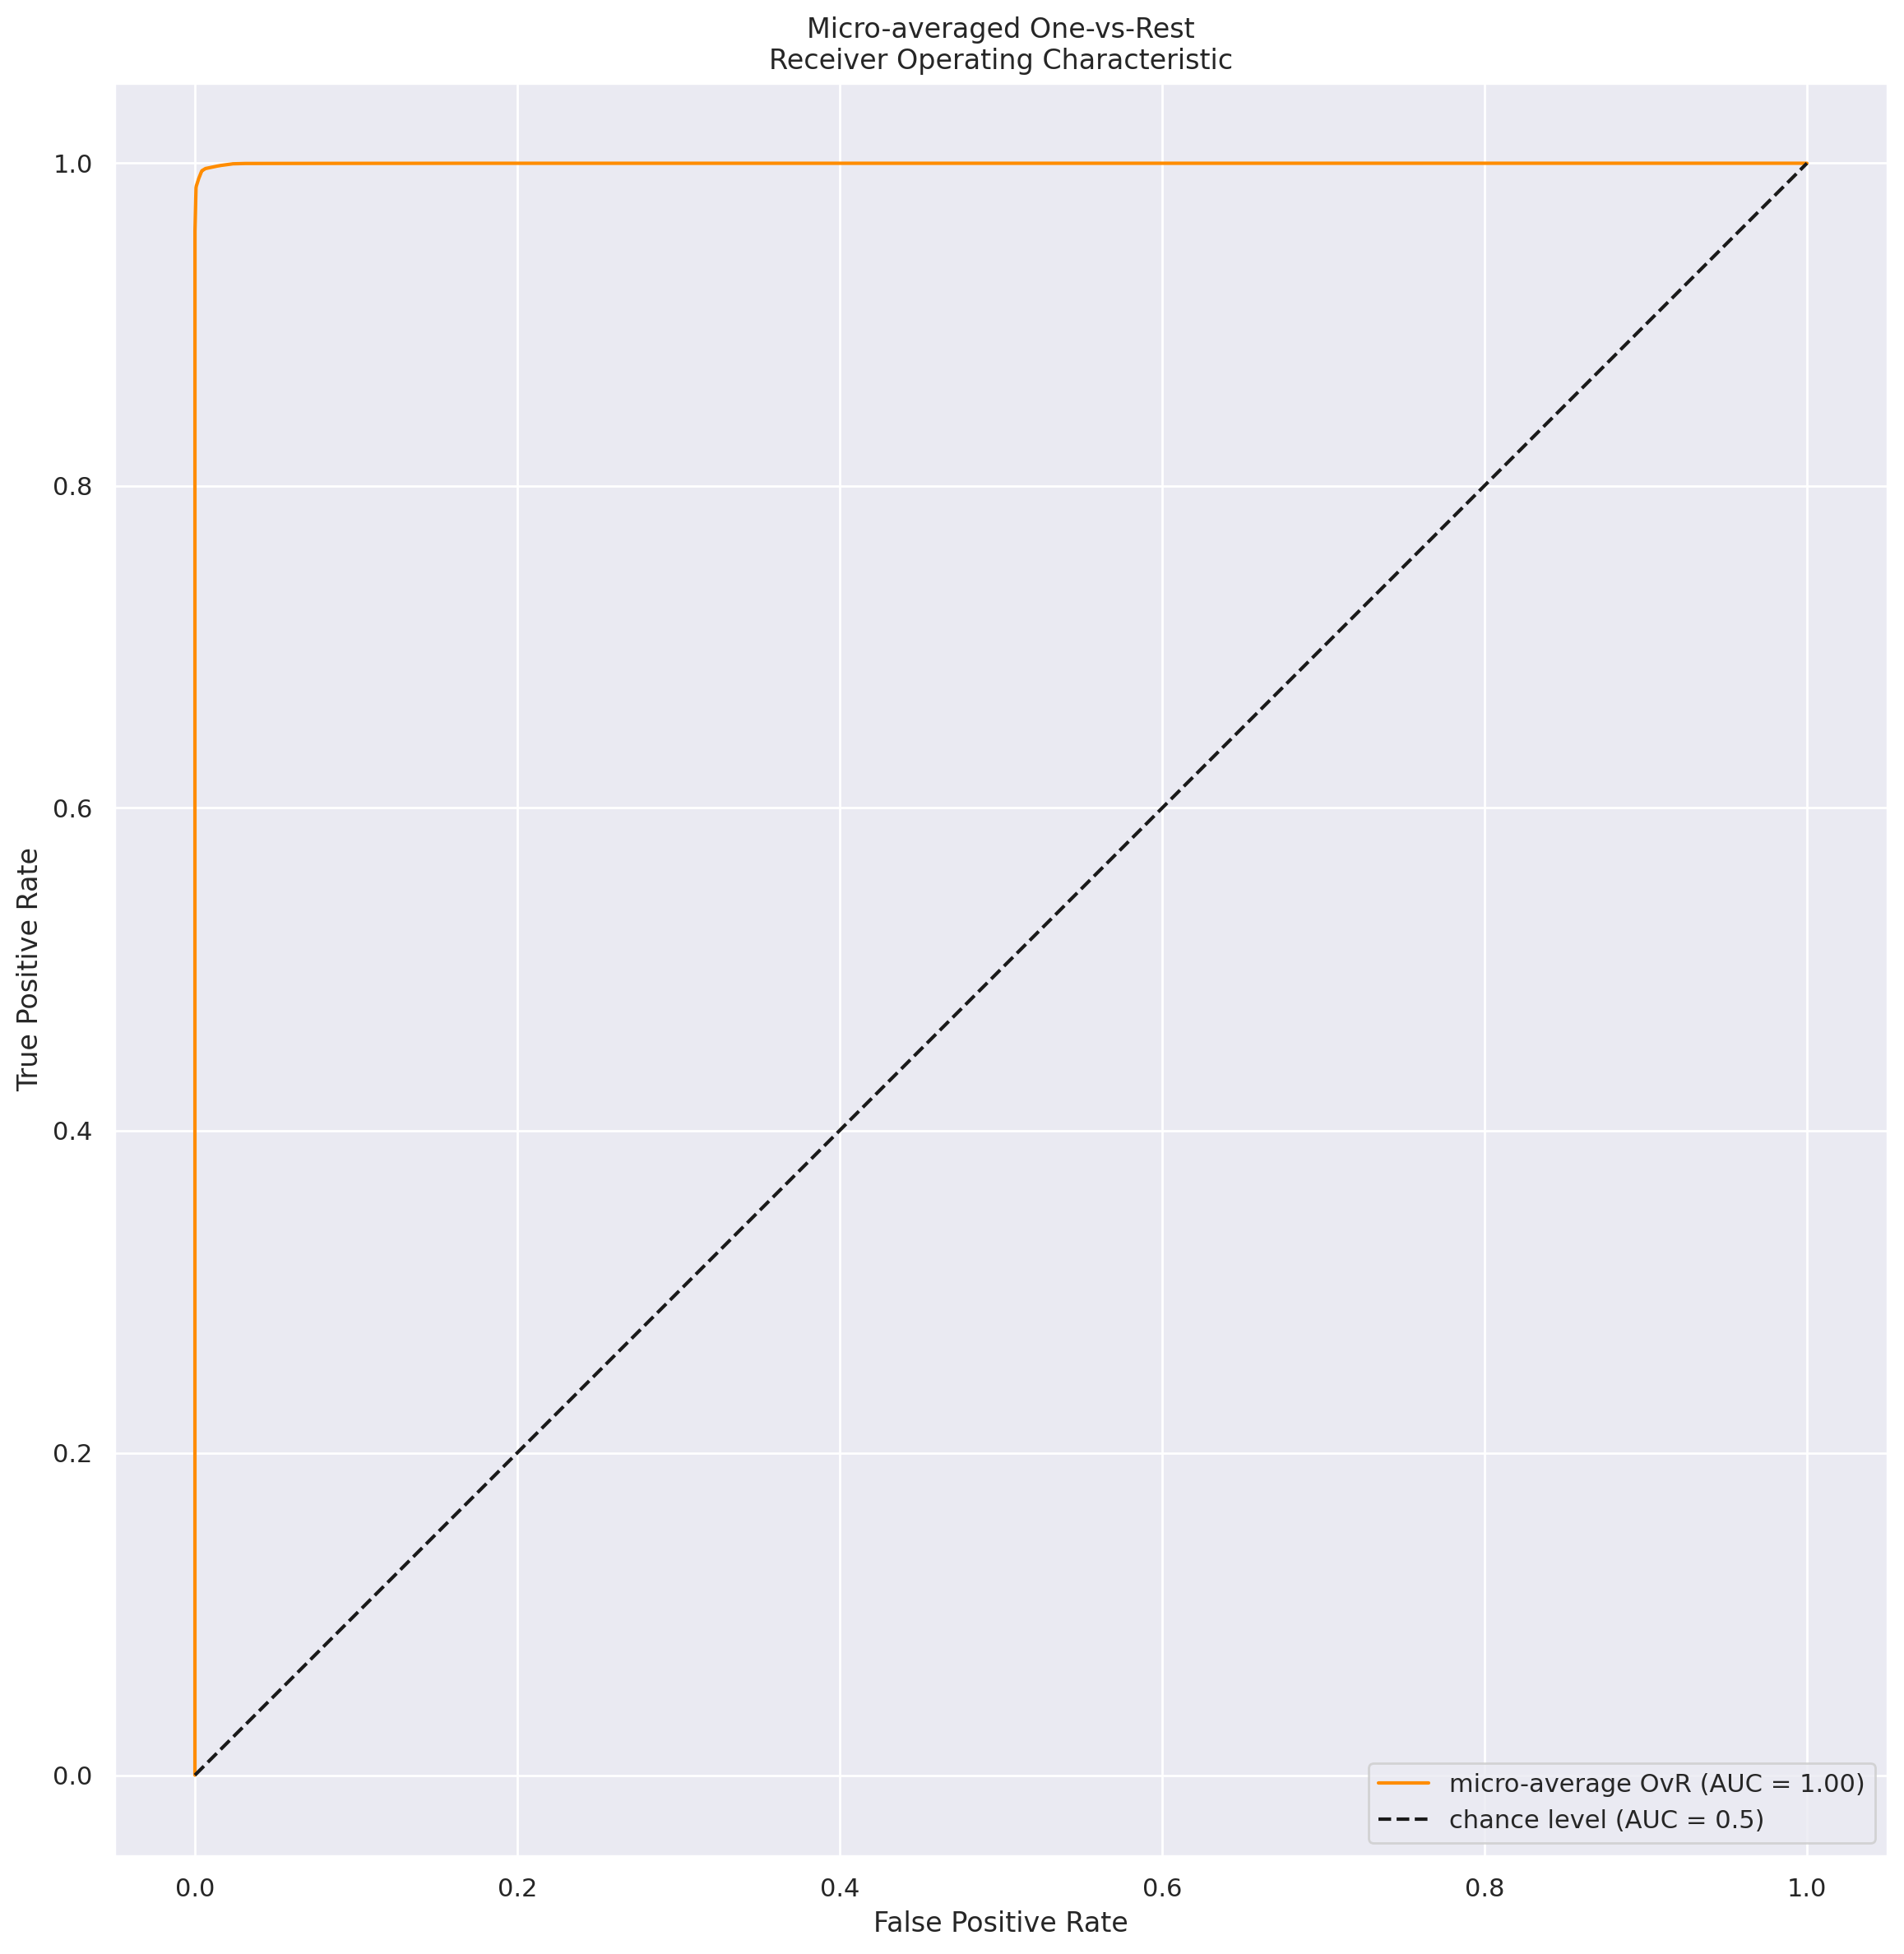

In [161]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_sc.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [166]:
# implementing Random Forest Model
rfst = RandomForestClassifier(n_estimators = 30) # Craeting instance of random classifier

# Training the model and calculating the time for training and testing models
start_time = time.time()
rfst.fit(X_train, y_train.values.ravel())
end_time = time.time()
test_time_RF = end_time-start_time#getting the training time
print("Training time: ", test_time_RF)

# Testing the model
start_time = time.time()
y_test_pred = rfst.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
train_acc_RF = rfst.score(X_train, y_train)#getting training accuracy
test_acc_RF = rfst.score(X_test, y_test)#getting testing accuracy

print("Train score is:",train_acc_RF )
print("Test score is:",test_acc_RF )

Arr_accuracy_test.append(test_acc_RF)#appending to the array Arr_accuracy_test
Arr_accuracy_train.append(train_acc_RF)#appending to the array Arr_accuracy_train

Training time:  10.245729207992554
Testing time:  1.1330671310424805
Train score is: 0.9999797579045383
Test score is: 0.9996660088052224


In [167]:
arr_testing_time.append(test_time_RF)#appending to the array arr_testing_time

In [168]:
# Making predictions on the test set
y_test_pred = rfst.predict(X_test)

#classification report
report = classification_report(y_test, y_test_pred)


print(report)#printing the classification report

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       1.00      1.00      1.00     19353
       probe       1.00      0.99      0.99       850
         r2l       0.99      0.94      0.96       235
         u2r       0.91      0.83      0.87        12

    accuracy                           1.00     98805
   macro avg       0.98      0.95      0.96     98805
weighted avg       1.00      1.00      1.00     98805



In [169]:
# Predicting for the test dataset
y_test_pred = rfst.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)#printing the confusion matrix

[[78354     1     0     0     0]
 [    0 19349     2     2     0]
 [    0    11   839     0     0]
 [    0    14     0   220     1]
 [    0     2     0     0    10]]


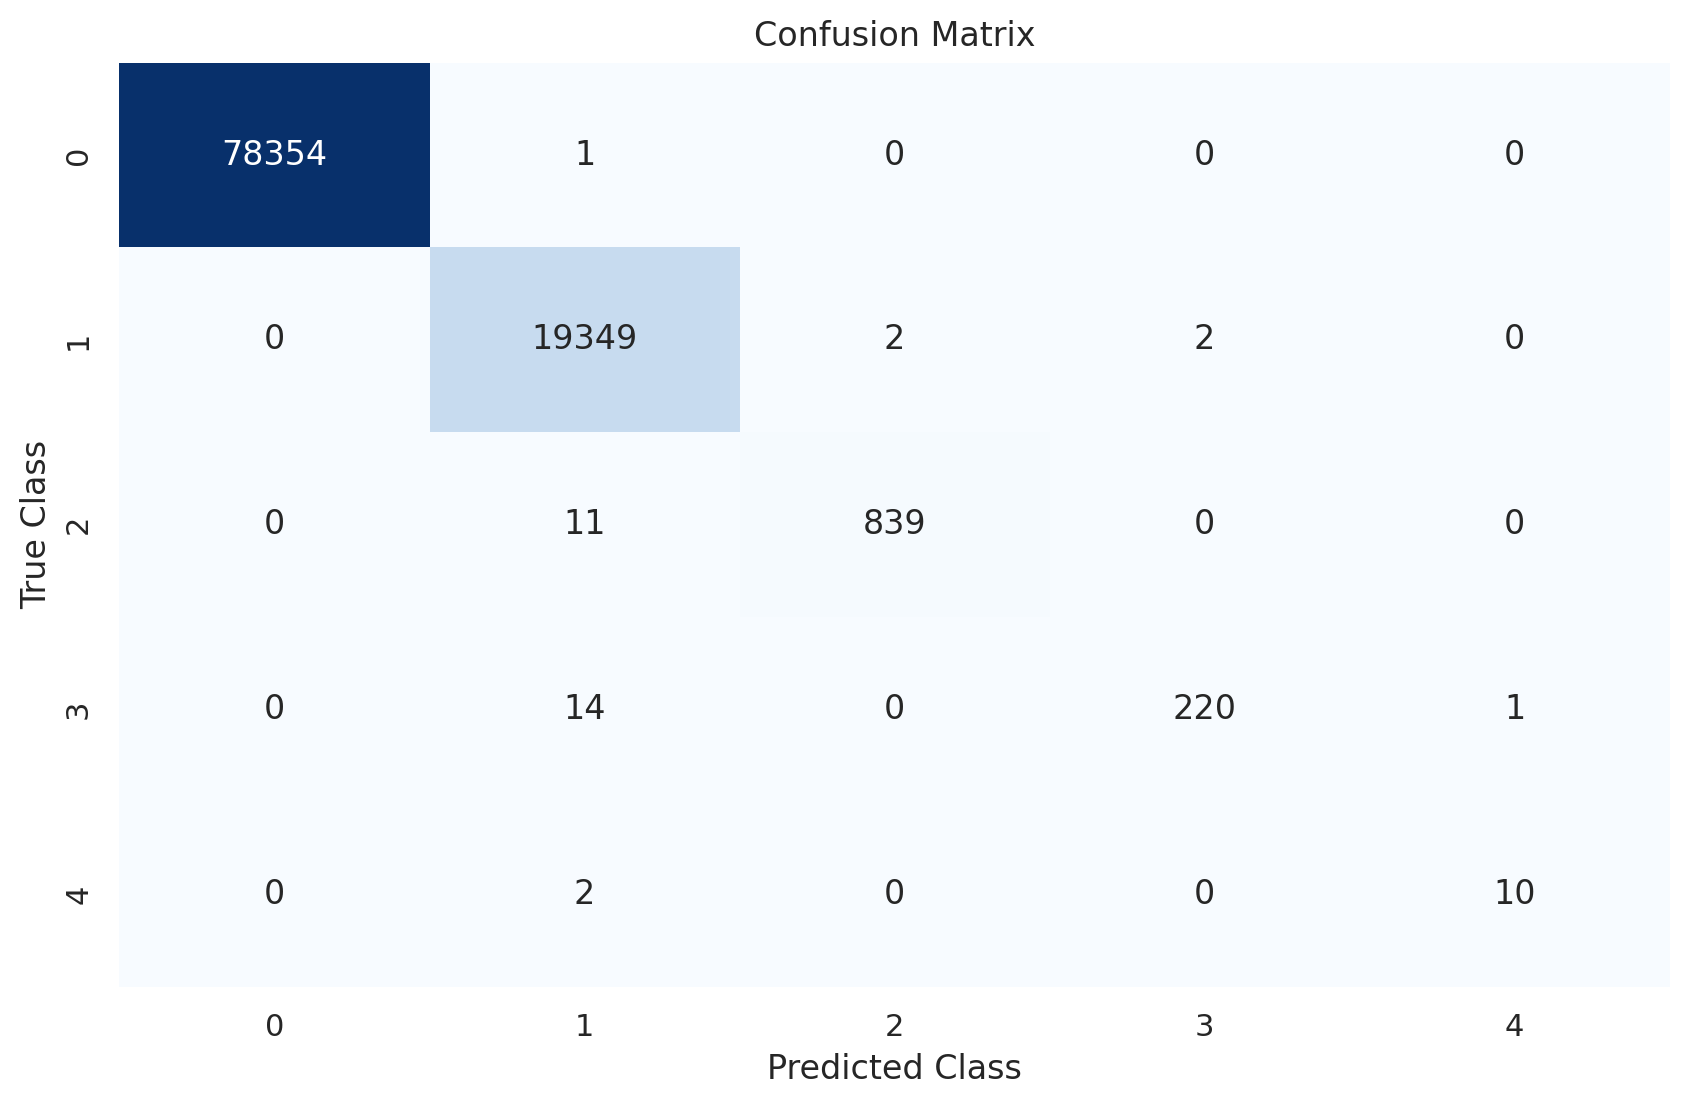

In [170]:
# heatmap of the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.show()#printing the confusion matrix

In [171]:
y_sc = rfst.fit(X_train, y_train.values.ravel()).predict_proba(X_test)

In [172]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(98805, 5)

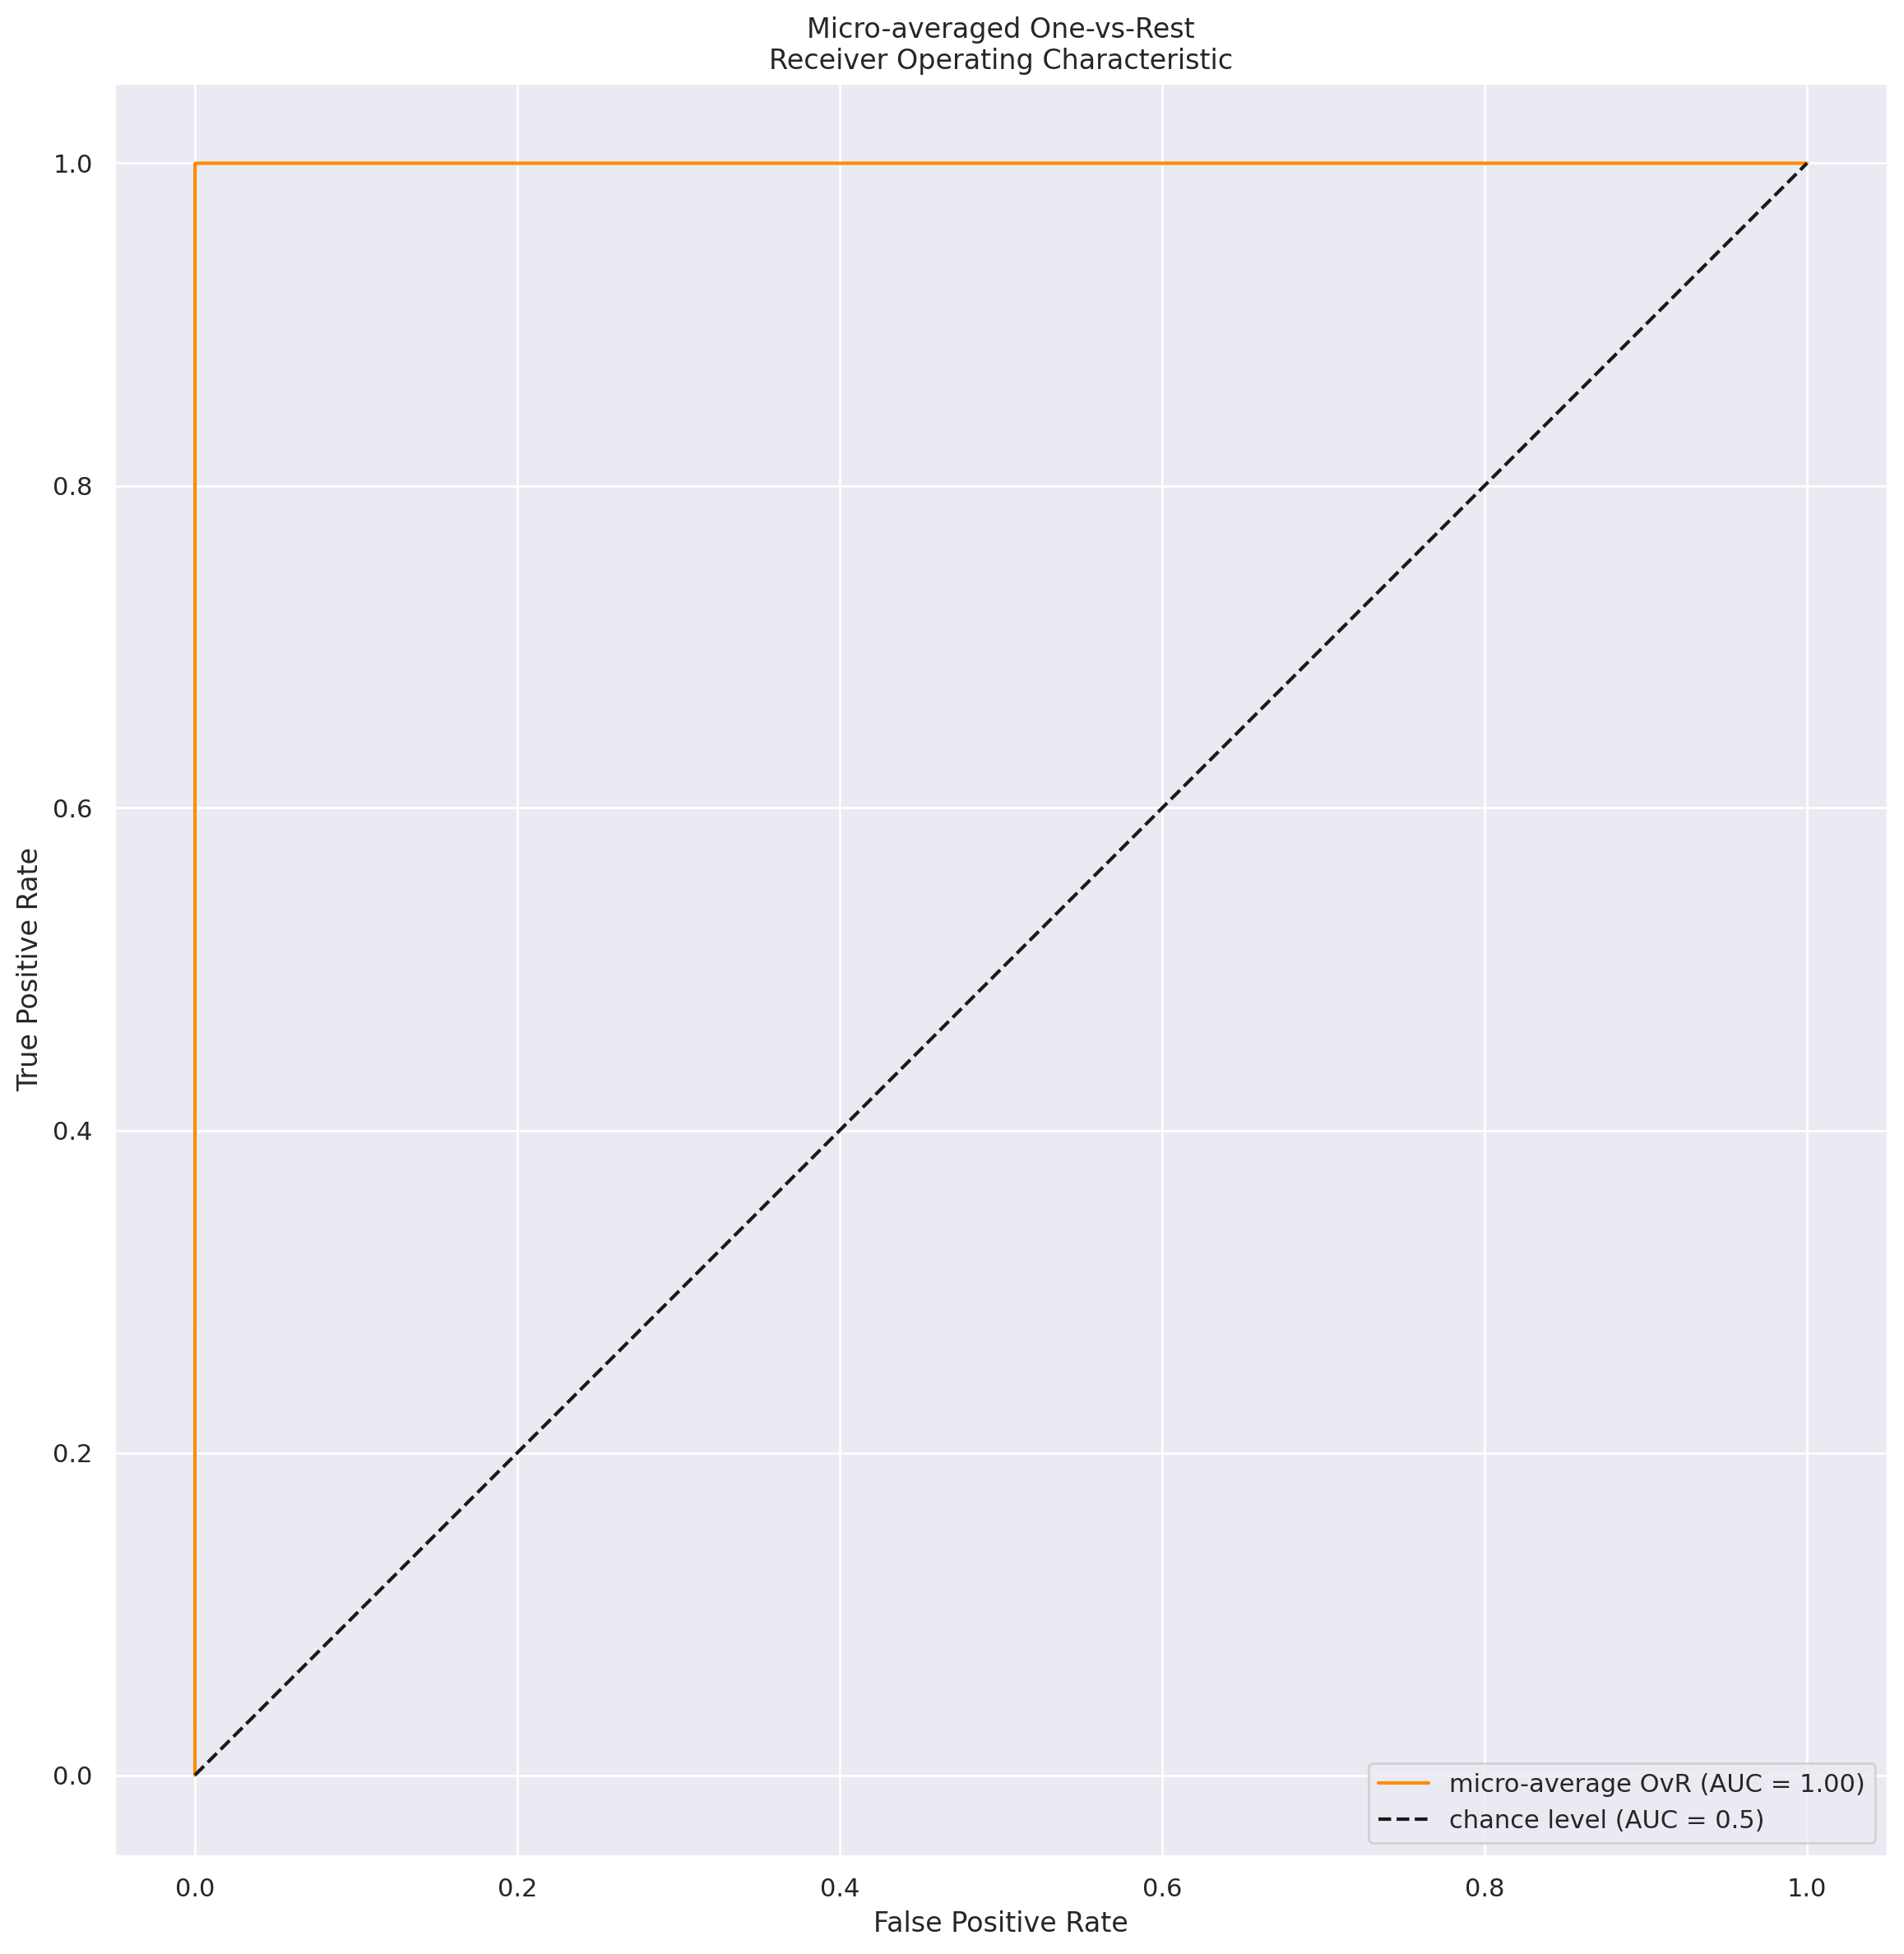

In [173]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_sc.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [174]:
# implemennting Support Vector Classifier
svc = SVC(gamma = 'scale') # Creating instance of support vector classifier with gamma as scale

# Training the model
start_time = time.time()
svc.fit(X_train, y_train.values.ravel())
end_time = time.time()
test_time_SVM = end_time-start_time#getting the training time
print("Training time: ", test_time_SVM)

# Testing the model
start_time = time.time()
y_test_pred = svc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
train_acc_SVM =svc.score(X_train, y_train)#getting training accuracy
test_acc_SVM= svc.score(X_test, y_test)#getting testing accuracy
      

print("Train score is:", train_acc_SVM)
print("Test score is:",test_acc_SVM )

Training time:  741.0688502788544
Testing time:  185.46604084968567
Train score is: 0.9987804137484312
Test score is: 0.9987348818379637


In [175]:
Arr_accuracy_test.append(test_acc_SVM)#appending to the array Arr_accuracy_test
Arr_accuracy_train.append(train_acc_SVM)#appending to the array Arr_accuracy_train
arr_testing_time.append(test_time_SVM)#appending to the array arr_testing_time

In [176]:
print(arr_testing_time)
print(Arr_accuracy_test)
print(Arr_accuracy_train)

[0.07998299598693848, 10.245729207992554, 741.0688502788544]
[0.9905470370932645, 0.9996660088052224, 0.9987348818379637]
[0.9905747743006356, 0.9999797579045383, 0.9987804137484312]


In [179]:
# Making predictions on the test set
y_test_pred = svc.predict(X_test)

# classification report
report = classification_report(y_test, y_test_pred)


print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       1.00      1.00      1.00     19353
       probe       0.99      0.96      0.98       850
         r2l       0.87      0.86      0.87       235
         u2r       0.80      0.67      0.73        12

    accuracy                           1.00     98805
   macro avg       0.93      0.90      0.91     98805
weighted avg       1.00      1.00      1.00     98805



In [180]:
y_test_pred = svc.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)#printing the confusion matrix

[[78352     3     0     0     0]
 [   20 19299     7    26     1]
 [    1    30   819     0     0]
 [    1    31     0   202     1]
 [    0     1     0     3     8]]


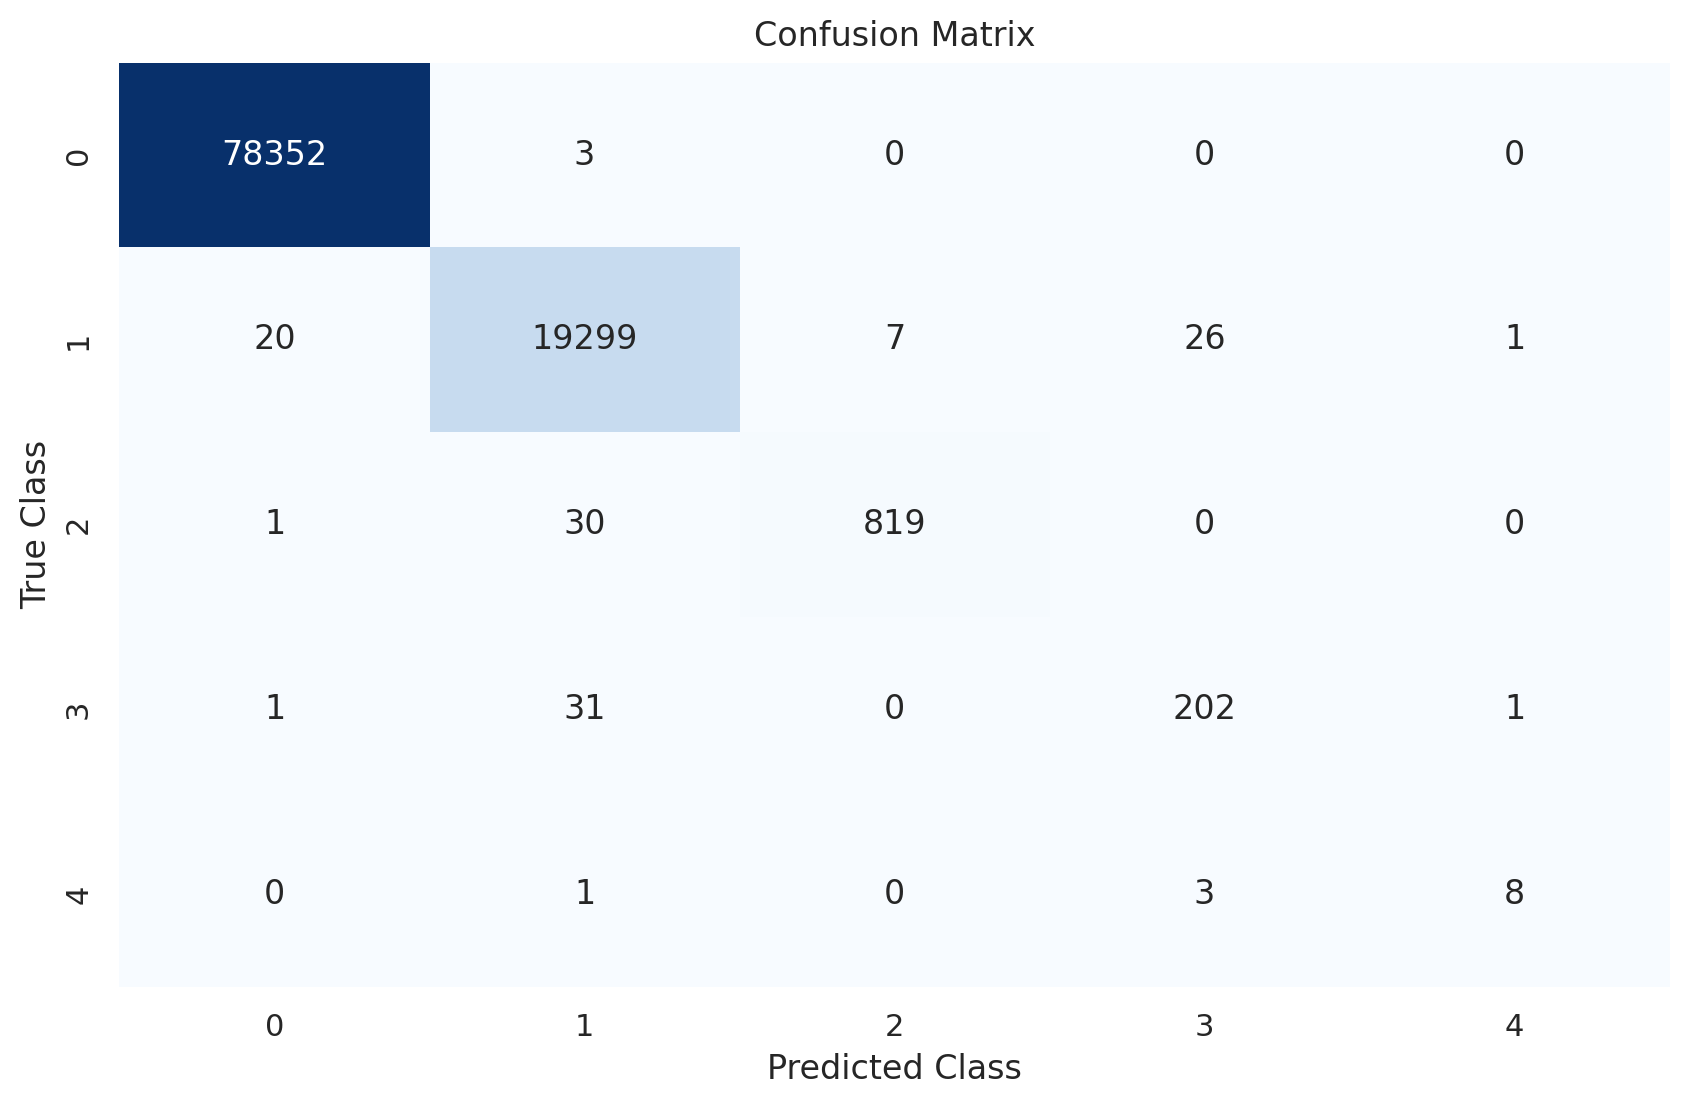

In [181]:
# heatmap of the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.show()#visualizing the confusion matrix

In [183]:
# implementing Logistic Regression
lr = LogisticRegression(max_iter = 1200000) # creating instance of logistic regression with maximum number of iterations as 1200000

# Training the model
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
test_time_LR = end_time-start_time#getting the training time
print("Training time: ", test_time_LR)

# Testing the model
start_time = time.time()
y_test_pred = lr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
train_acc_LR =lr.score(X_train, y_train)#getting training accuracy
test_acc_LR= lr.score(X_test, y_test)#getting testing accuracy
      
# test and train scores
print("Train score is:", train_acc_LR)
print("Test score is:",test_acc_LR )



Training time:  62.551809310913086
Testing time:  0.09121155738830566
Train score is: 0.9940918383871098
Test score is: 0.9941399726734477


In [184]:
Arr_accuracy_test.append(test_acc_LR)#appending to the array Arr_accuracy_test
Arr_accuracy_train.append(train_acc_LR)#appending to the array Arr_accuracy_train
arr_testing_time.append(test_time_LR)#appending to the array arr_testing time

In [185]:
print(arr_testing_time)
print(Arr_accuracy_test)
print(Arr_accuracy_train)

[0.07998299598693848, 10.245729207992554, 741.0688502788544, 62.551809310913086]
[0.9905470370932645, 0.9996660088052224, 0.9987348818379637, 0.9941399726734477]
[0.9905747743006356, 0.9999797579045383, 0.9987804137484312, 0.9940918383871098]


In [186]:
# Making predictions on the test set
y_test_pred = lr.predict(X_test)

#classification report
report = classification_report(y_test, y_test_pred)


print(report)#printing the classification report

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       0.97      1.00      0.99     19353
       probe       0.98      0.89      0.94       850
         r2l       0.85      0.83      0.84       235
         u2r       0.89      0.67      0.76        12

    accuracy                           0.99     98805
   macro avg       0.94      0.88      0.90     98805
weighted avg       0.99      0.99      0.99     98805



In [187]:
# Making predictions on the test set
y_test_pred = lr.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)#printing the confusion matrix

[[77985   369     1     0     0]
 [   28 19281    12    32     0]
 [    4    88   758     0     0]
 [    4    36     0   194     1]
 [    0     2     0     2     8]]


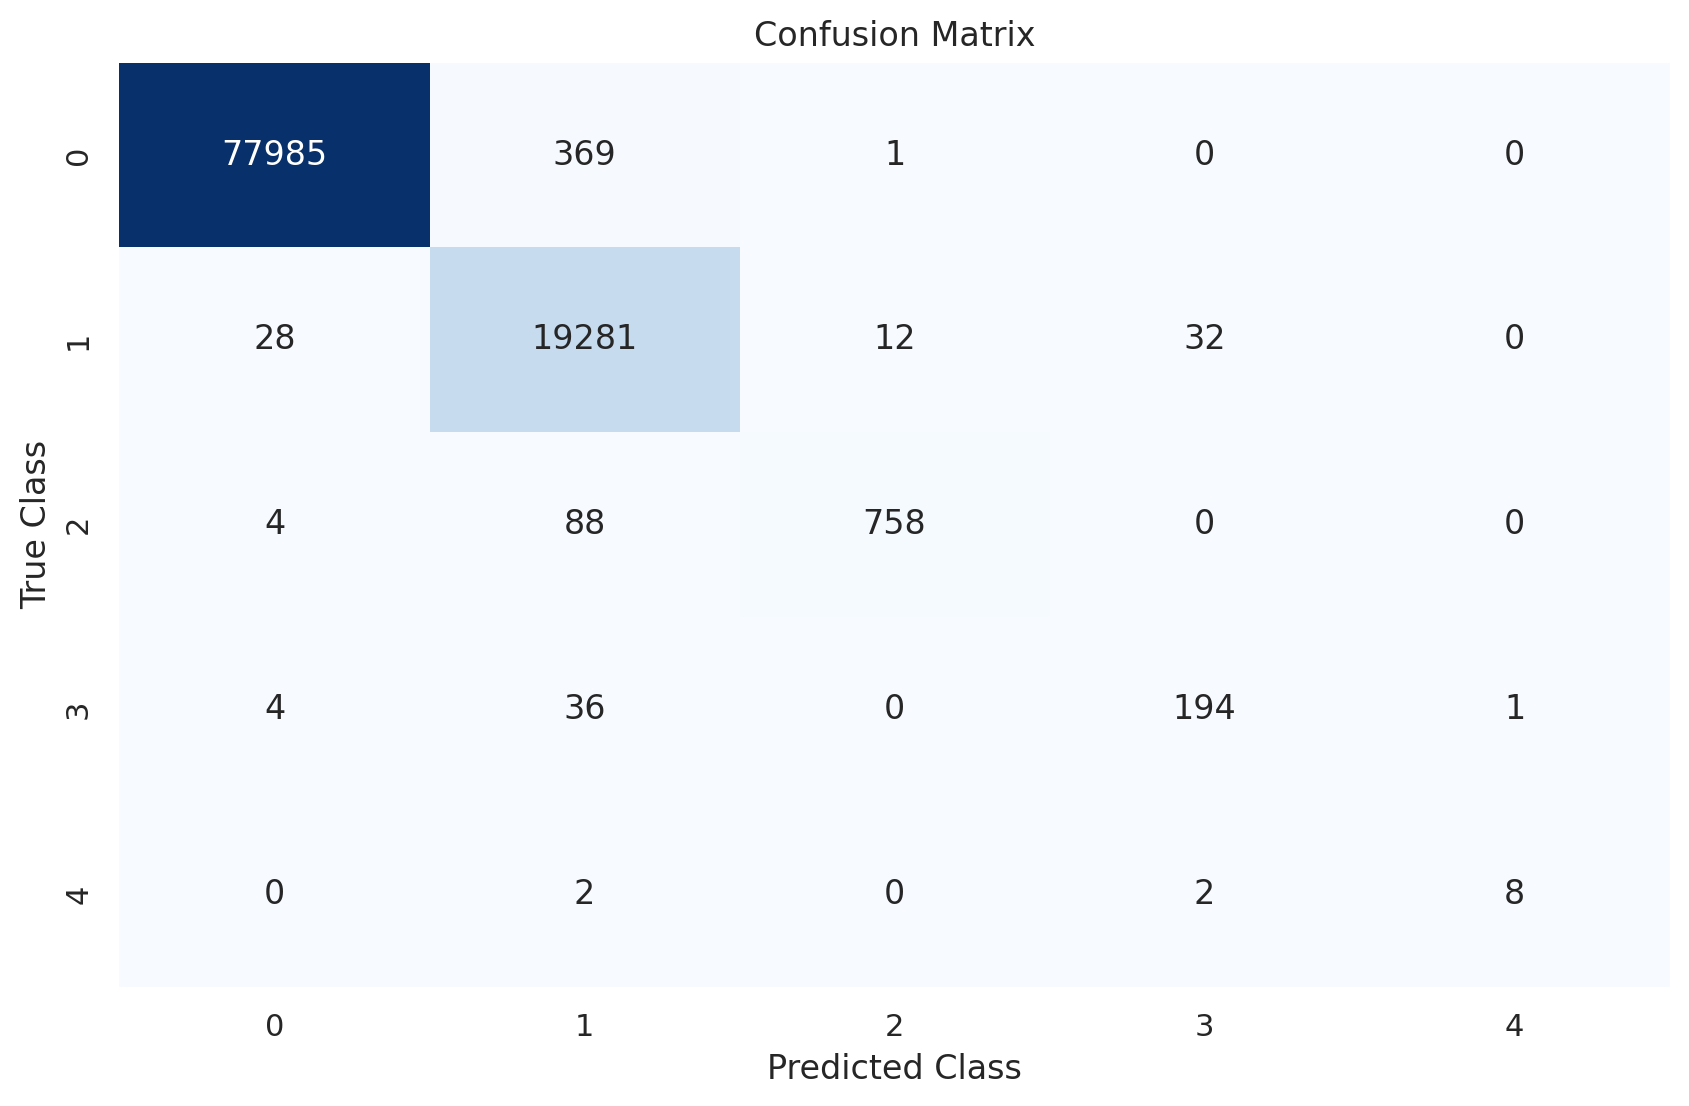

In [188]:
# heatmap of the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.show()#visualizing the confusion matrix

In [189]:
y_sc = lr.fit(X_train, y_train.values.ravel()).predict_proba(X_test)

In [190]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(98805, 5)

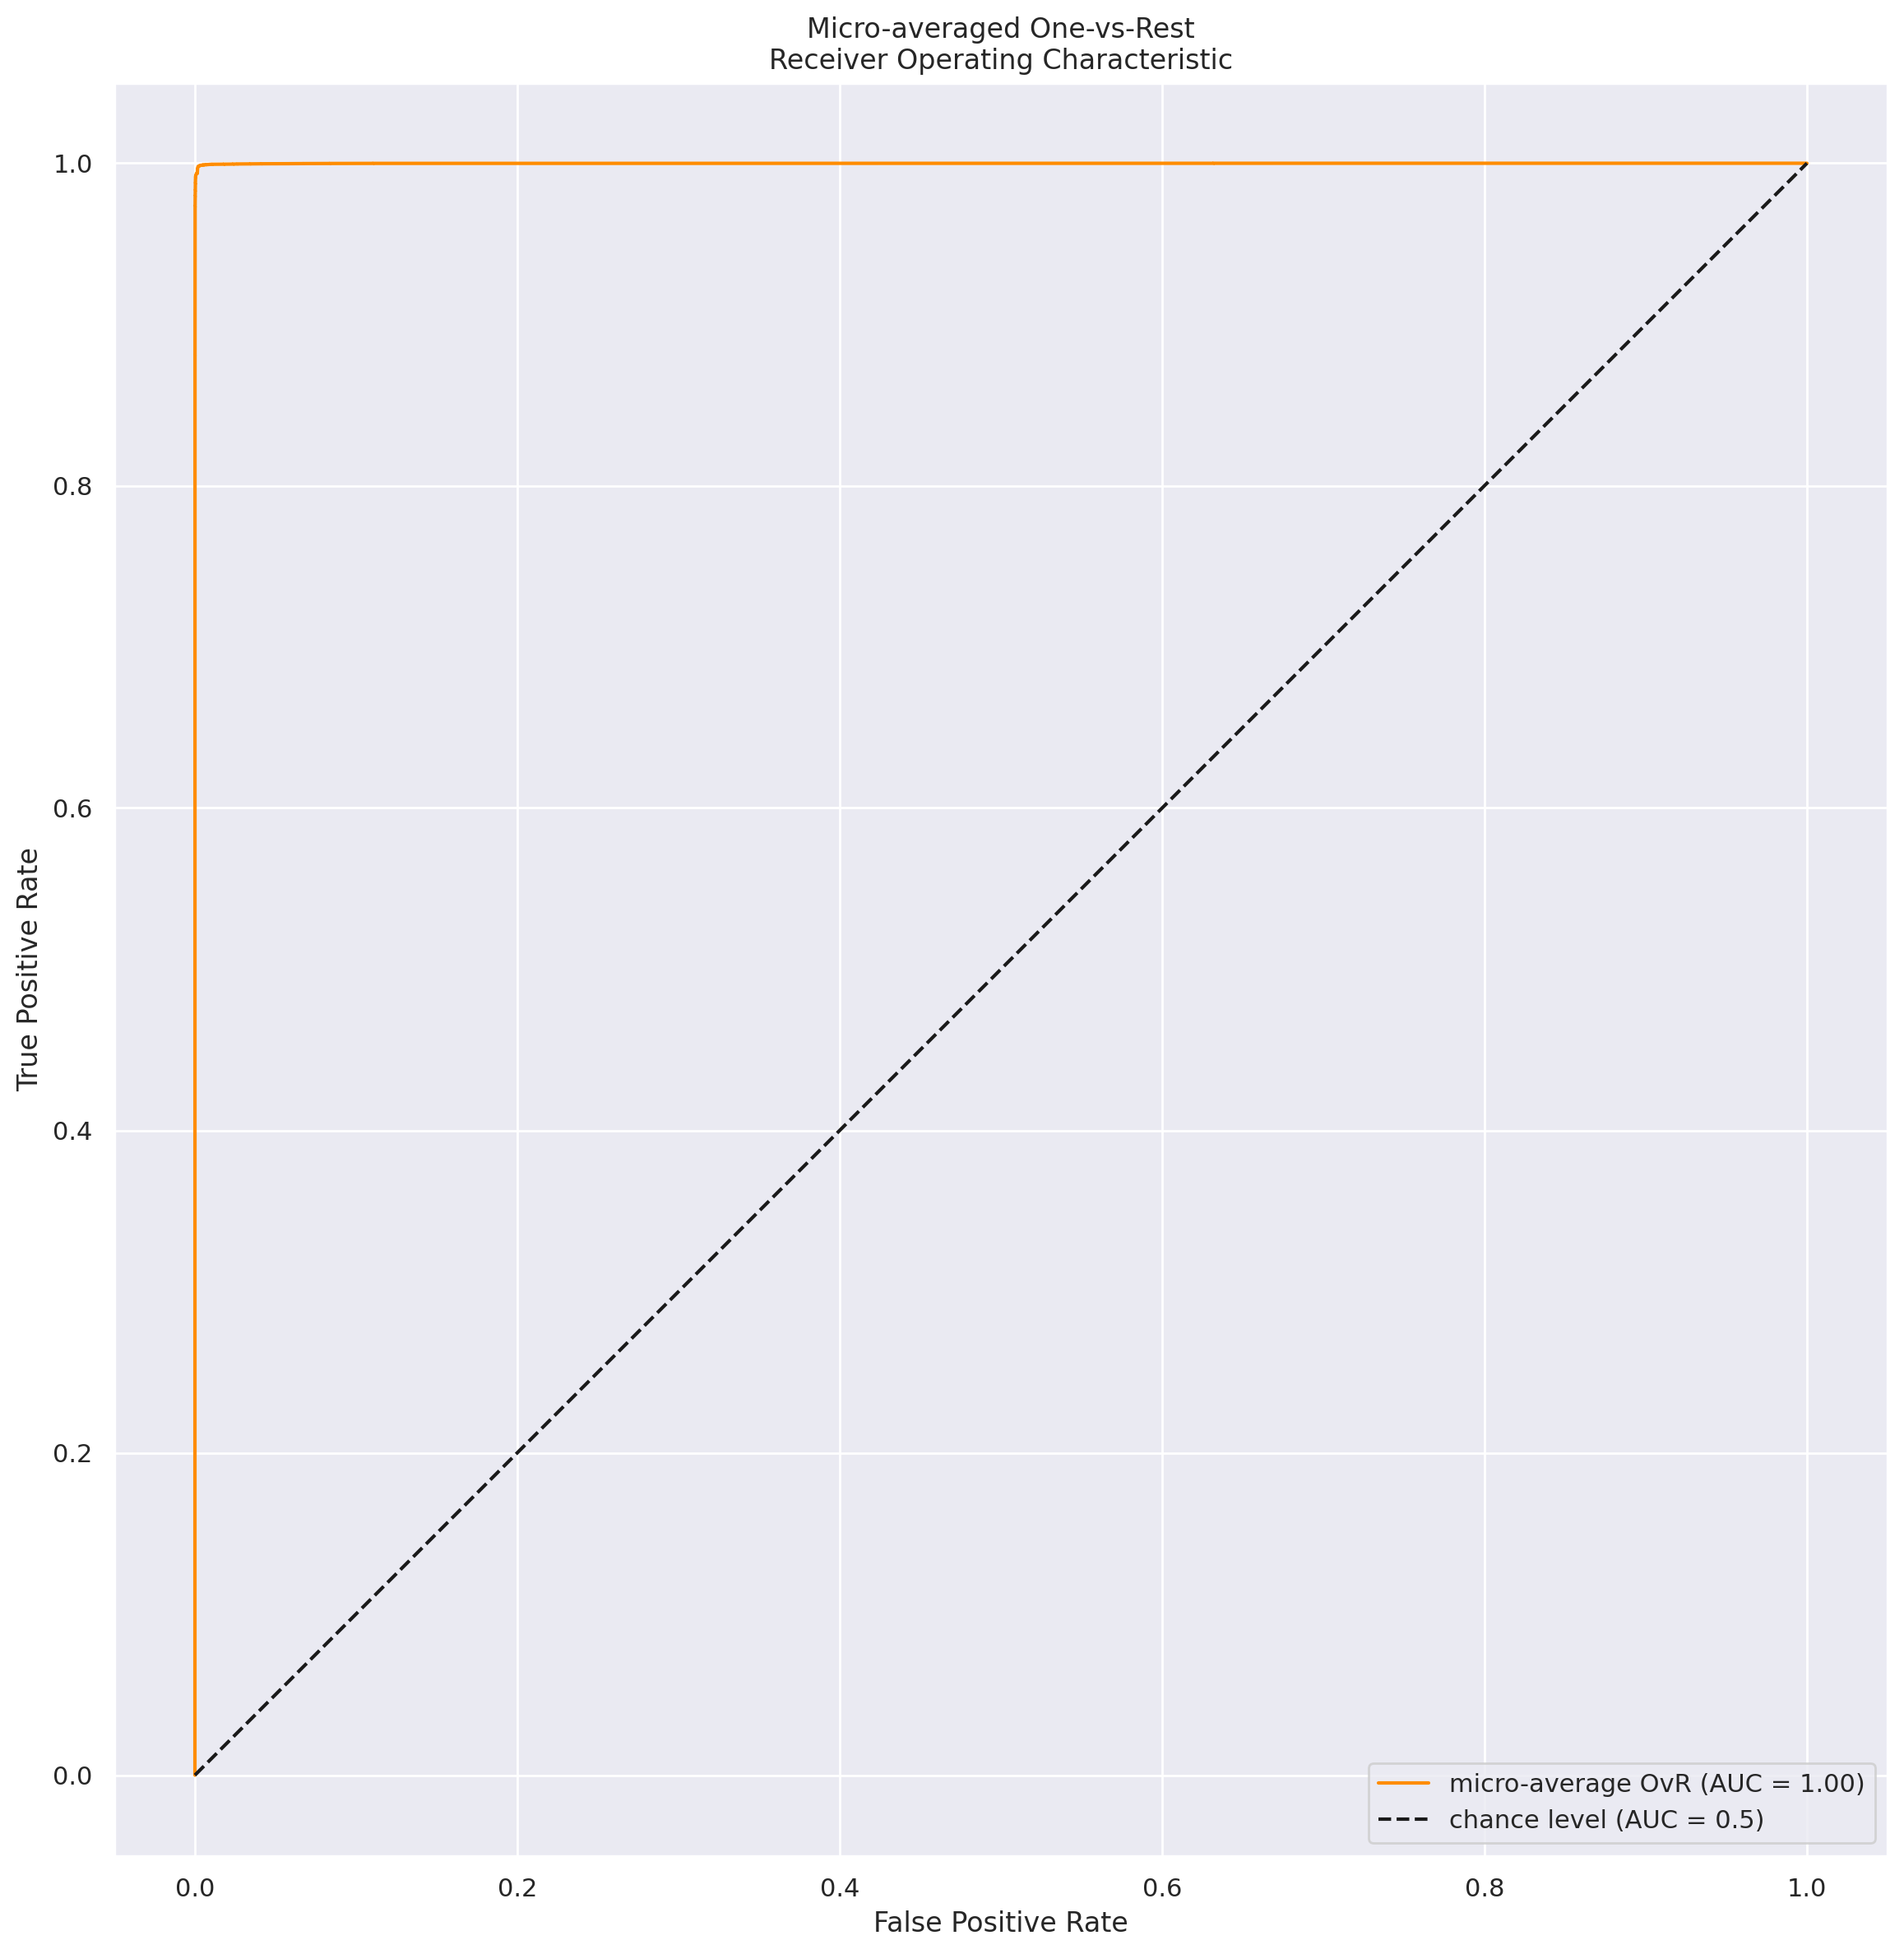

In [193]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_sc.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")

plt.legend()
plt.show()

In [194]:
# implementing Gaussian Naive Bayes Model
gnb = GaussianNB()  # Creating instance of Gaussian Naive Bayes

# Training the model and calculating the training and testing the model
start_time = time.time()
gnb.fit(X_train, y_train.values.ravel())
end_time = time.time()
test_time_NB = end_time-start_time
print("Training time: ", test_time_NB)


#Testing the model
start_time = time.time()
y_test_pred = gnb.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

train_acc_NB =gnb.score(X_train, y_train)
test_acc_NB= gnb.score(X_test, y_test)
      
#test and train scores
print("Train score is:", train_acc_NB)
print("Test score is:",test_acc_NB)

Training time:  1.115621566772461
Testing time:  0.6097512245178223
Train score is: 0.8812295048783451
Test score is: 0.8810181670968068


In [195]:
Arr_accuracy_test.append(test_acc_NB)
Arr_accuracy_train.append(train_acc_NB)
arr_testing_time.append(test_time_NB)

In [196]:
print(arr_testing_time)
print(Arr_accuracy_test)
print(Arr_accuracy_train)

[0.07998299598693848, 10.245729207992554, 741.0688502788544, 62.551809310913086, 1.115621566772461]
[0.9905470370932645, 0.9996660088052224, 0.9987348818379637, 0.9941399726734477, 0.8810181670968068]
[0.9905747743006356, 0.9999797579045383, 0.9987804137484312, 0.9940918383871098, 0.8812295048783451]


In [197]:
# Making predictions on the test set using Gaussian Naive Bayes
y_test_pred = gnb.predict(X_test)

# Generating and printing the classification report
report = classification_report(y_test, y_test_pred)

print(report)

              precision    recall  f1-score   support

         dos       0.98      0.94      0.96     78355
      normal       0.97      0.64      0.77     19353
       probe       0.09      0.99      0.17       850
         r2l       0.32      0.38      0.35       235
         u2r       0.01      0.83      0.01        12

    accuracy                           0.88     98805
   macro avg       0.47      0.76      0.45     98805
weighted avg       0.97      0.88      0.91     98805



In [198]:
# To generate and print Confusion matrix
y_test_pred = gnb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[73649   378  4271     2    55]
 [ 1733 12463  3759   182  1216]
 [    9     1   838     0     2]
 [    0     2     2    89   142]
 [    0     0     0     2    10]]


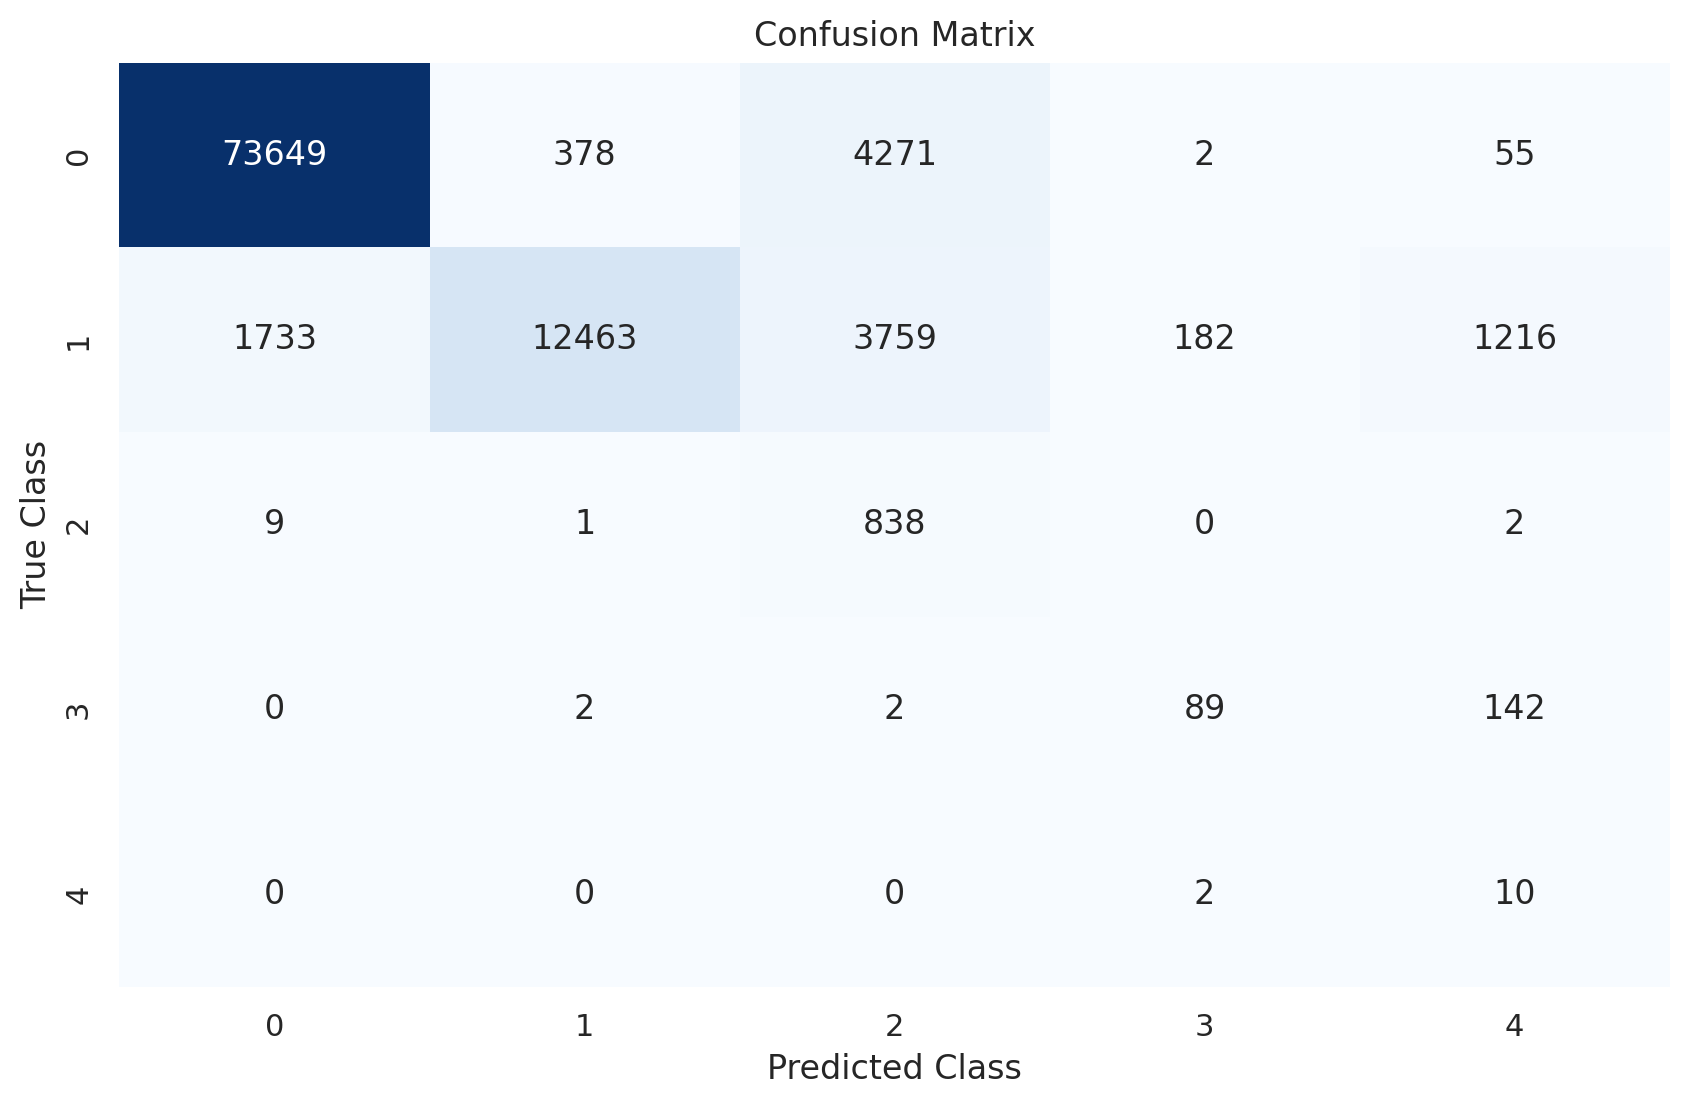

In [199]:
# heatmap of the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.show()

In [200]:
y_sc = gnb.fit(X_train, y_train.values.ravel()).predict_proba(X_test)

In [201]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(98805, 5)

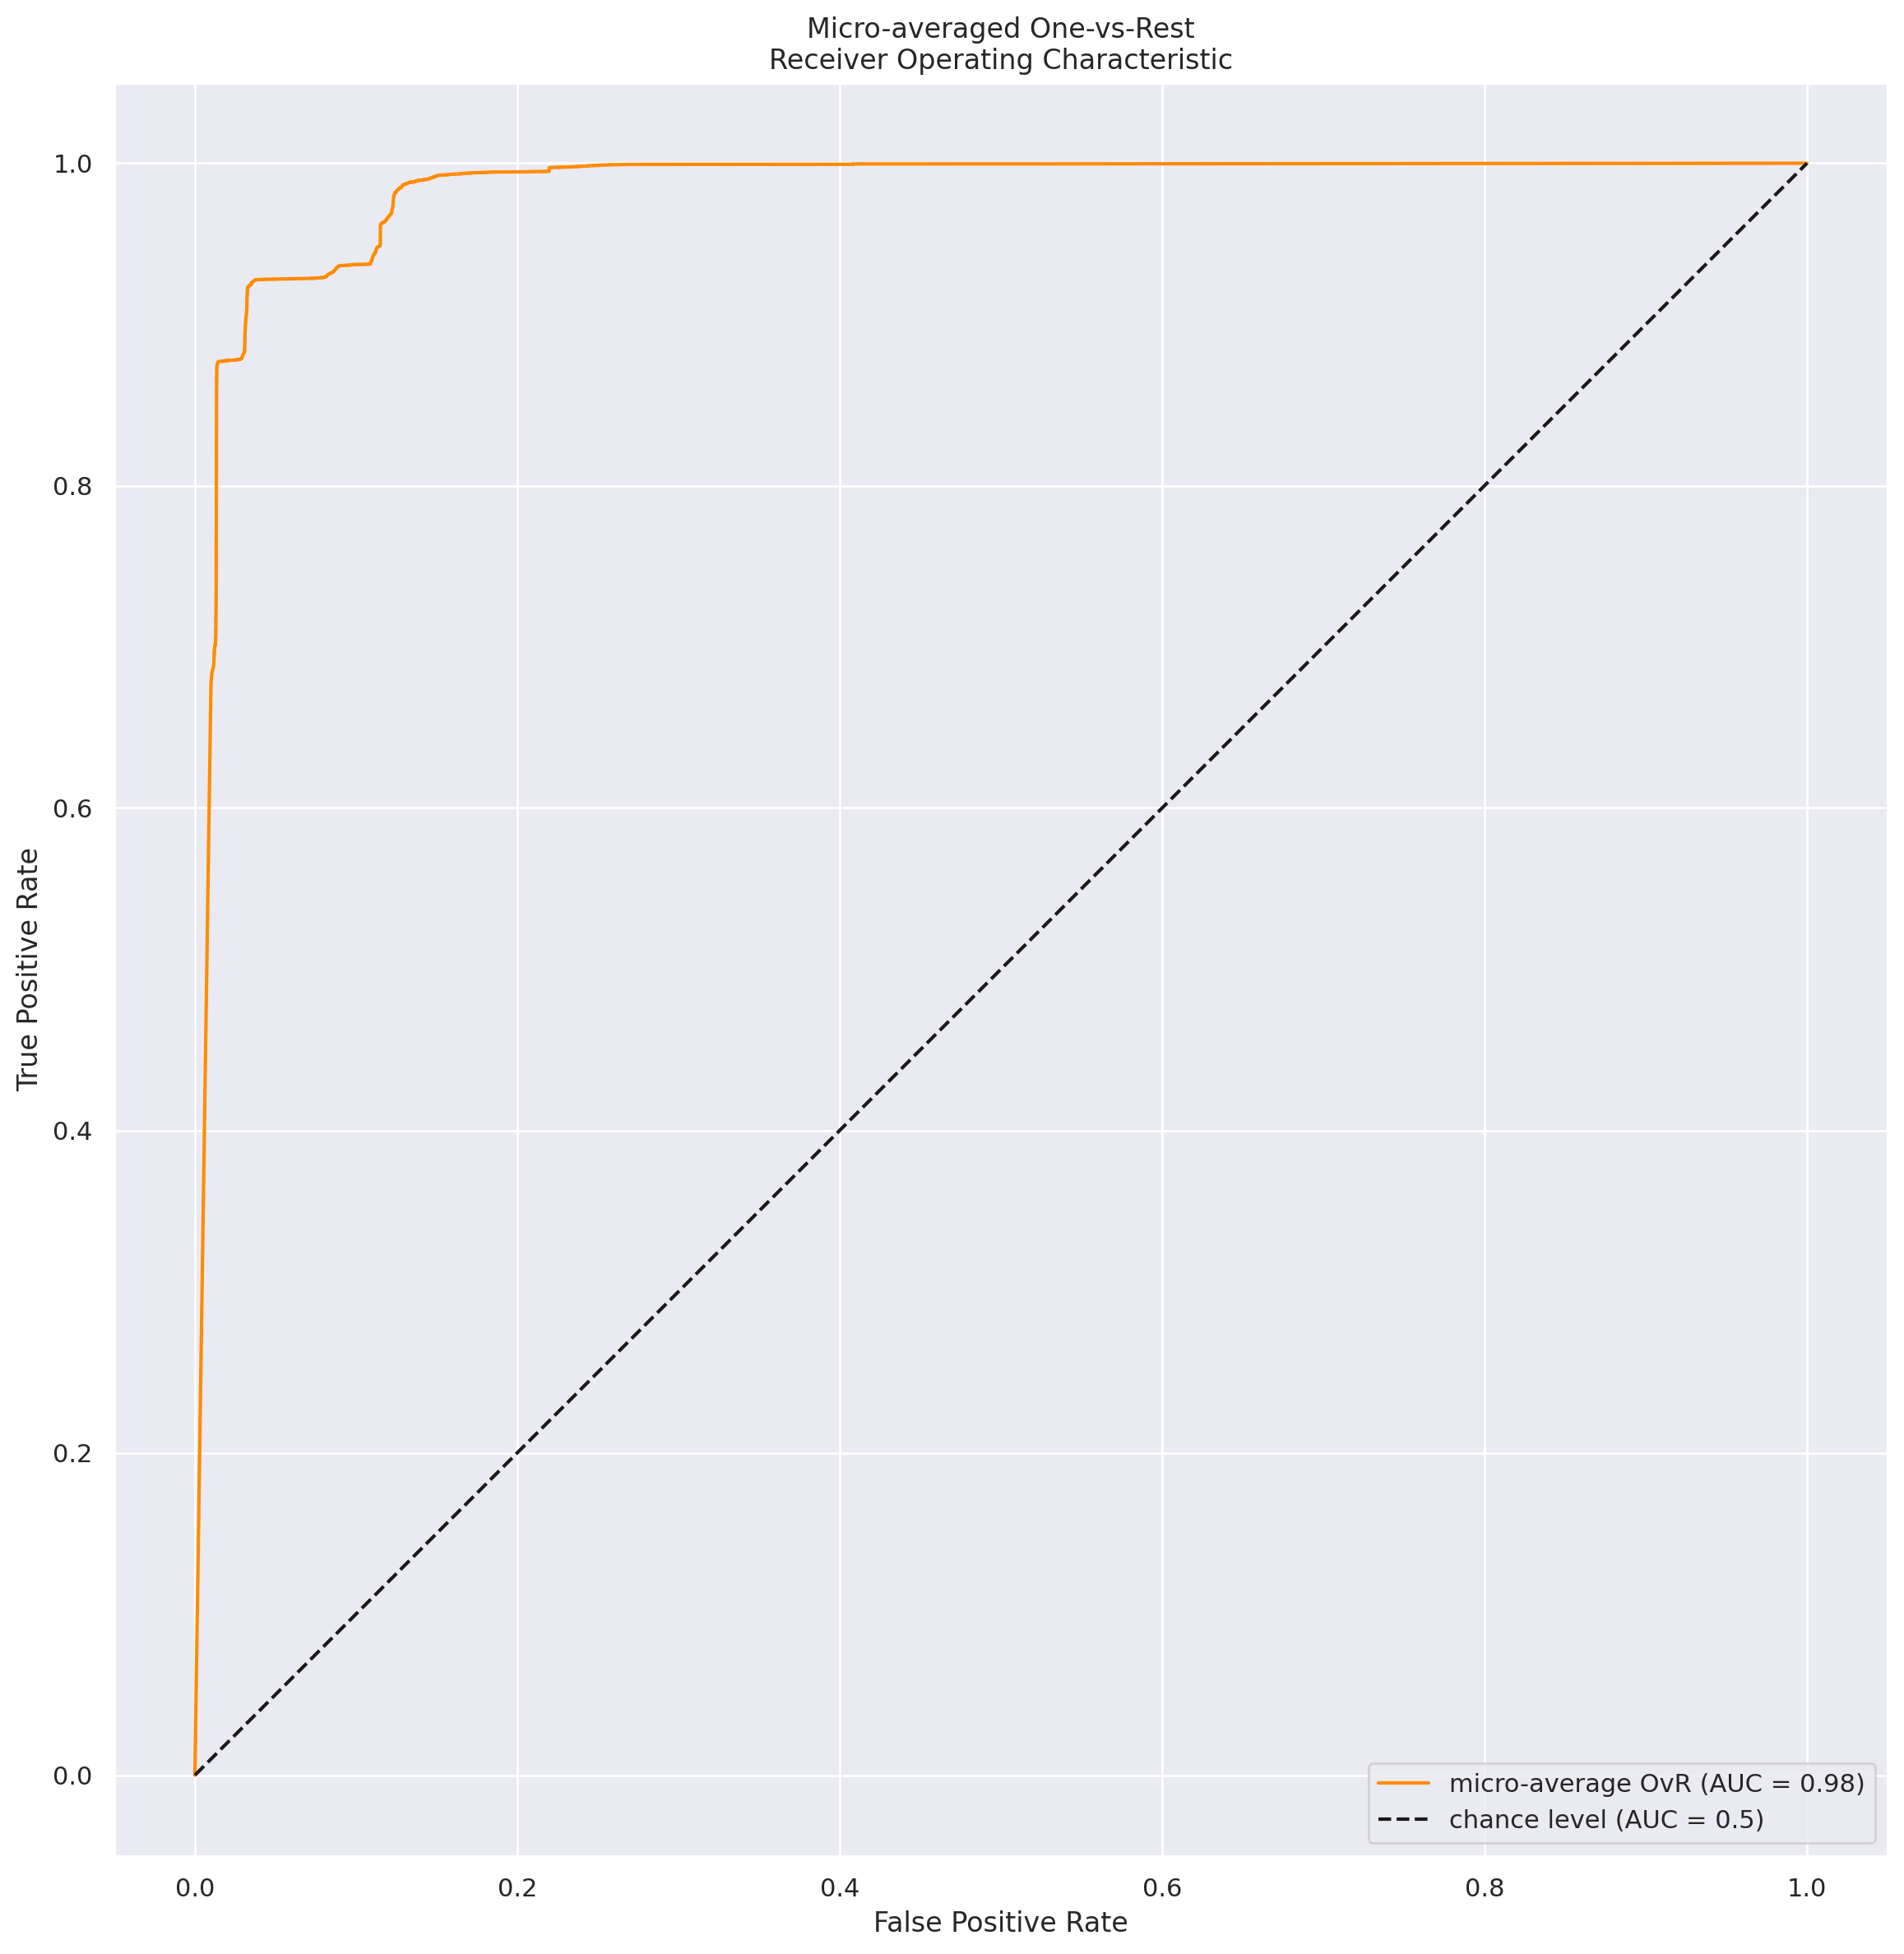

In [202]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_sc.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")

plt.legend()
plt.show()

In [203]:
Arr_accuracy_test
Arr_accuracy_train
arr_testing_time

[0.07998299598693848,
 10.245729207992554,
 741.0688502788544,
 62.551809310913086,
 1.115621566772461]

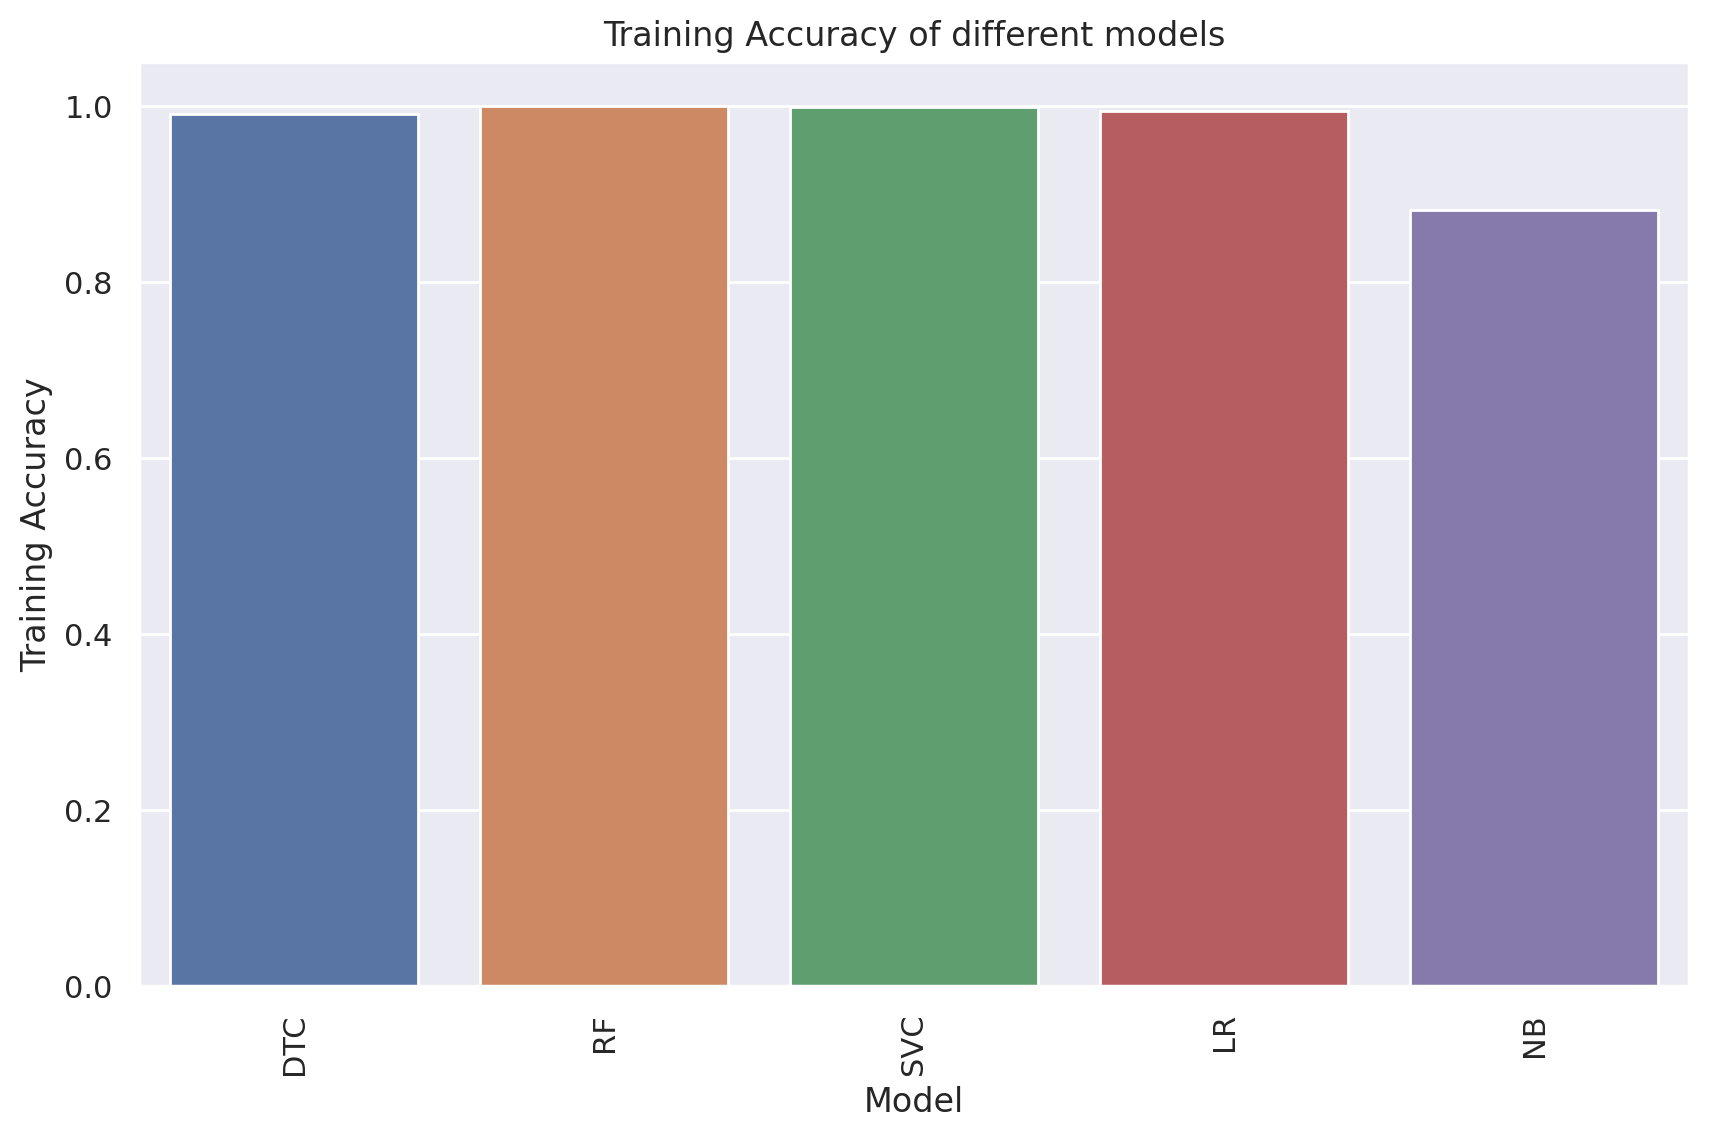

In [204]:
#plotting training accuracy for different models
names = ['DTC', 'RF', 'SVC', 'LR', 'NB']
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=Arr_accuracy_train)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.title("Training Accuracy of different models")
plt.show()


In [205]:
print(Arr_accuracy_train)

[0.9905747743006356, 0.9999797579045383, 0.9987804137484312, 0.9940918383871098, 0.8812295048783451]


We observe that Random Forest and Support Vector has the highest accuracy which is 0.9999 

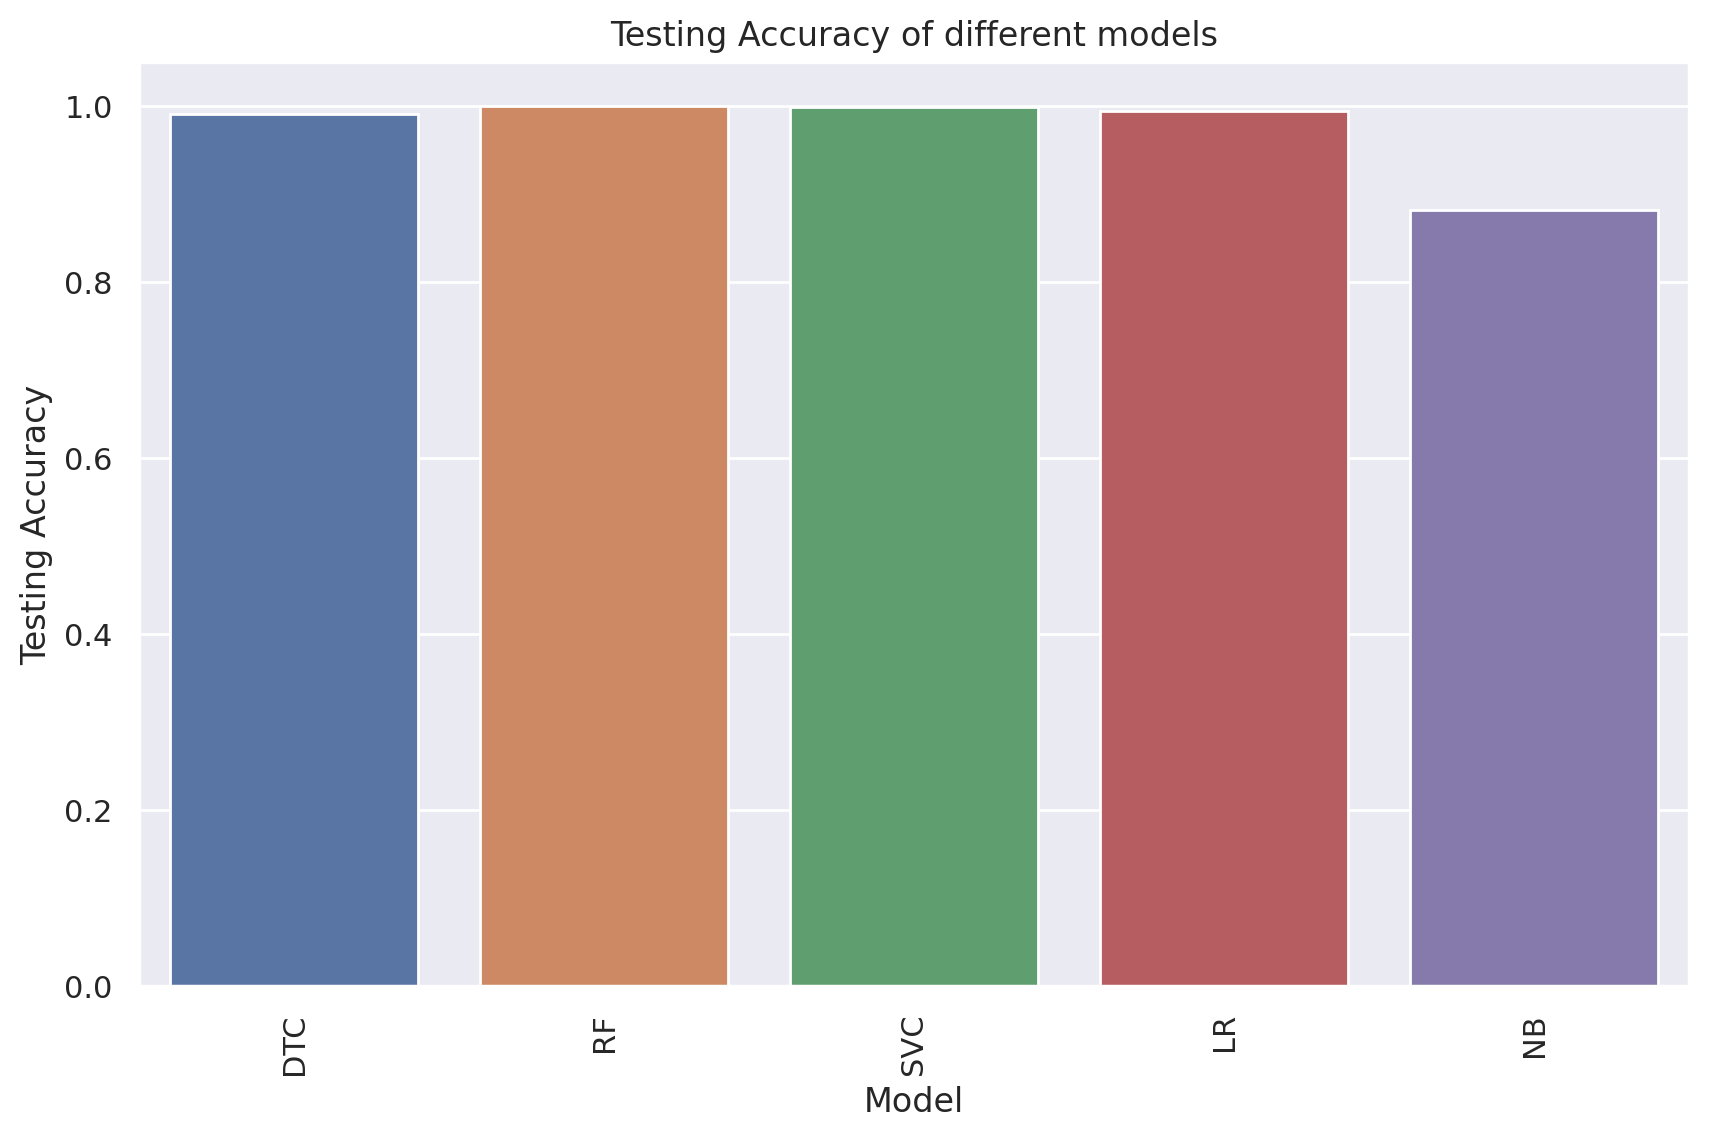

In [206]:
names = ['DTC', 'RF', 'SVC', 'LR', 'NB']

#plotting testing accuracy for different models
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=Arr_accuracy_test)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.title("Testing Accuracy of different models")
plt.show()

It is noticed that similar to training accuracy, testing accuracy is also high for Random forests and Support Vector Classifier

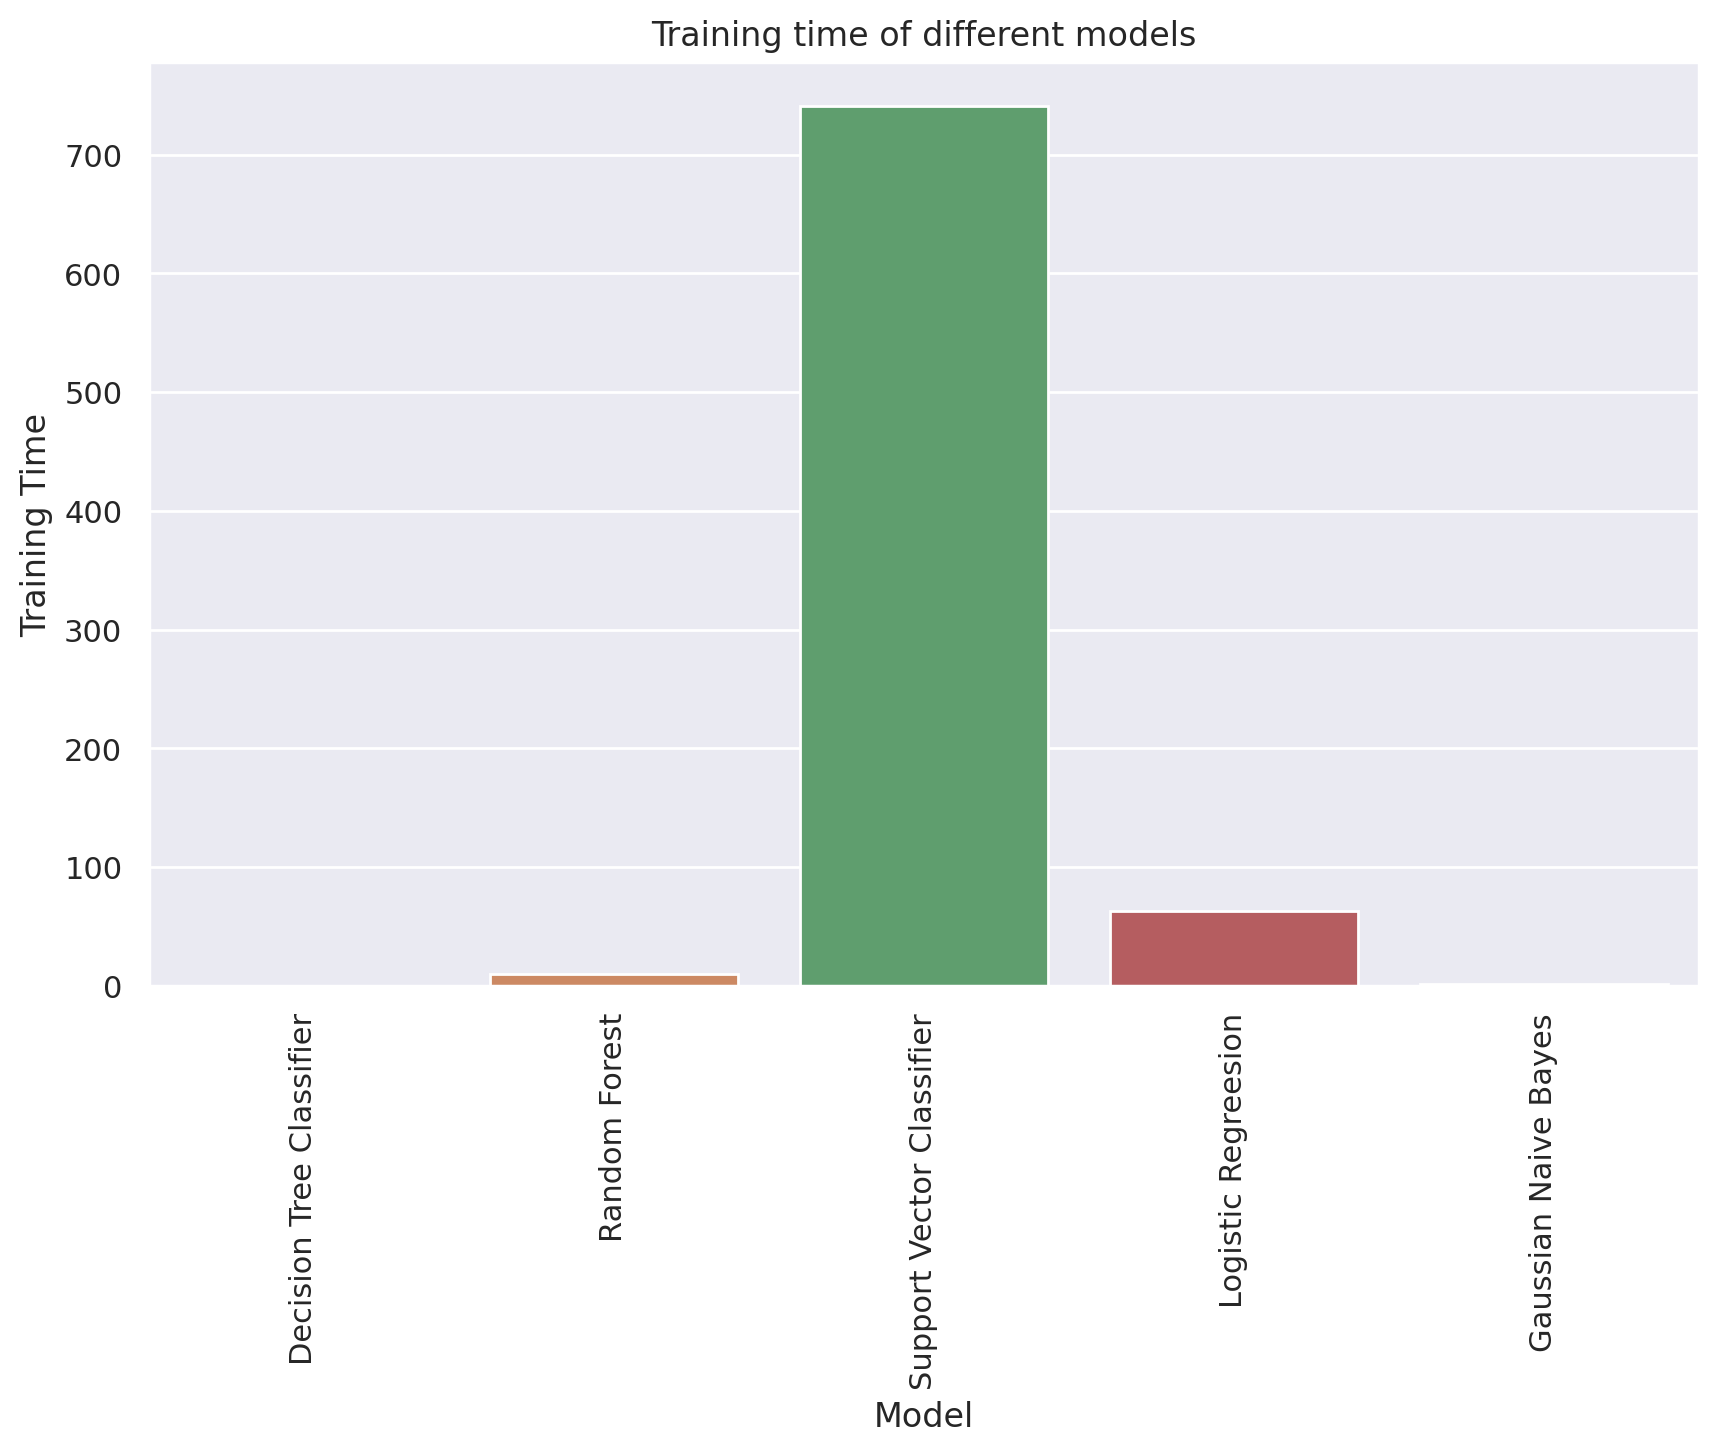

In [207]:
names = ['Decision Tree Classifier', 'Random Forest', 'Support Vector Classifier', 'Logistic Regreesion', 'Gaussian Naive Bayes']

#plotting training times for different models
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=arr_testing_time)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title("Training time of different models")
plt.show()

Though training and testing accuracy is high for support vector classifier, training is time is very high compared to other classification models.

In [ ]:
names = ['Decision Tree Classifier', 'Random Forest', 'Support Vector Classifier', 'Logistic Regreesion', 'Gaussian Naive Bayes']





### Tabulating the Train Accuracy, Test Accuracy and Model Traing time for all the classifiers.

In [208]:
df = pd.DataFrame({'Train Accuracy': Arr_accuracy_train,
                    'Test Accuracy': Arr_accuracy_test,
                   'Model Training Time': arr_testing_time}, index=names)
df

,Train Accuracy,Test Accuracy,Model Training Time
Decision Tree Classifier,0.990575,0.990547,0.079983
Random Forest,0.999980,0.999666,10.245729
Support Vector Classifier,0.998780,0.998735,741.068850
Logistic Regreesion,0.994092,0.994140,62.551809
Gaussian Naive Bayes,0.881230,0.881018,1.115622


From the table above, we can conclude that Random Classifier is the best among Decision Tree  Classifier, Support Vector Classifier,Logistics Regression, Gaussian Naive Bayes and Random Forest Classifier with high accuraccy in classifying web requests as either benign or malicious.